# Hotel Booking Demand

## Business Problem Understanding

**Context**

Sebuah hotel yang berlokasi di Portugal menghadapi tingginya jumlah pembatalan pemesanan kamar. Banyak pelanggan yang melakukan booking namun membatalkannya sebelum hari kedatangan. Kondisi ini menyebabkan hotel kehilangan potensi pendapatan, kesulitan dalam memaksimalkan tingkat hunian kamar, serta mengganggu perencanaan operasional seperti alokasi kamar dan penjadwalan staf.

Sehingga untuk mengatasi masalah tersebut, manajemen hotel ingin mengetahui dan memprediksi lebih awal apakah sebuah pelanggan yang telah melakukan booking berpotensi dibatalkan atau tidak. Informasi terkait negara asal, tipe deposit, tipe kamar, kebutuhan tempat parkir mobil dan permintaan spesial ada di tangan dari pelanggan hotel.

Target :

0 : Booking tidak dibatalkan

1 : Booking dibatalkan

**Problem Statement :**

Tingkat pembatalan pemesanan kamar hotel dapat menimbulkan kerugian bagi pihak hotel karena kamar yang dibatalkan sering kali tidak dapat dijual kembali dalam waktu terbatas. Proses pengelolaan reservasi menjadi tidak efisien apabila hotel memperlakukan semua pemesanan dengan tingkat prioritas yang sama tanpa mengetahui mana yang memiliki risiko tinggi untuk dibatalkan. Ketidakpastian ini membuat hotel kesulitasn dalam merencanakan okupansi dan menetapkan strategi overbooking yang tepat.

Ketika hotel mengalokasikan tenaga kerja, persiapan kamar, serta perencanaan kapasitas untuk seluruh reservasi tanpa mempertimbangkan risiko pembatalan, sebagian besar usaha berpotensi terbuang sia-sia apabila tamu tidak datang, sehingga efisiensi operasional menurun dan biaya tambahan tidak terhindarkan.

**Goals :**

Berdasarkan permasalahan diatas, Hotel Booking Demand memerlukan sistem prediksi untuk mengidentifikasi kemungkinan pembatalan reservasi oleh pelanggan guna meminimalkan kerugian, meningkatkan akurasi perencanaan okupansi dan mendukung keputusan bisnis strategi penjualan. Solusi ini dianggap berhasil apabila model mampu memberikan prediksi yang akurat dan dapat memberikan insight yang jelas mengenai faktor yang memengaruhi pembatalan reservasi.

**Analytic Approach :**

Pendekatan Analitik yang digunakan adalah membangun model klasifikasi untuk memprediksi apakah suatu reservasi akan dibatalkan. Prosesnya mencakup pembersihan data, pemilihan fitur, dan encoding variabel kategorikal. Evaluasi difokuskan pada metrik Recall dan AUC-ROC agar model mampu mendeteksi pembatalan secara akurat. Hasil model kemudian dianalisis untuk menemukan faktor-faktor utama yang memengaruhi pembatalan guna mendukung rekomendasi bisnis hotel.

**Model**

Logistic Regression

KNN

Decision Tree

Random Forest

XGBoost

LightGBM

## Data Understanding

Dataset source : https://drive.google.com/file/d/1_Joy0ViBJVbWGPPXZKmPEYszIa6aX8Y7/view

Notes:
-  Dataset tidak seimbang atau imbalanced
- Sebagian besar fitur bersifat kategorikal.
- Beberapa fitur kategorikal memiliki kardinalitas tinggi seperti country dan reserved_room_type.
- Setiap baris data merepresentasikan satu pemesanan kamar (booking) dari seorang pelanggan/hotel guest.

### Attribute Information - Hotel Booking Demand
| Attribute                  | Data Type | Description                                                                             |
| -------------------------- | --------- | --------------------------------------------------------------------------------------- |
| country                    | Text      | Negara asal pelanggan yang melakukan reservasi                                                                   |
| market_segment             | Text      | Segmentasi pasar tempat pelanggan melakukan booking (Direct, Online TA, Corporate, dll) |
| previous_cancellations     | Integer   | Jumlah pembatalan reservasi sebelumnya oleh pelanggan yang sama                                   |
| booking_changes            | Integer   | Jumlah perubahan pada reservasi sejak pertama kali dipesan                              |
| deposit_type               | Text      | Jenis deposit yang diberikan sebagai jaminan reservasi (No Deposit, Refundable, Non Refundable)                                  |
| days_in_waiting_list       | Integer   | Lama reservasi berada dalam waiting list sebelum dikonfirmasi                                                |
| customer_type              | Text      | Kategori pelanggan berdasarkan pola pemesanan (Transient, Contract, Group, Transient-party)                            |
| reserved_room_type         | Text      | Kode tipe kamar yang dipesan                                                            |
| required_car_parking_space | Integer   | Jumlah tempat parkir yang diminta                                                       |
| total_of_special_requests  | Integer   | Jumlah permintaan khusus pelanggan                                                     |
| is_canceled                | Integer   | **Target**: 0 = Booking tidak dibatalkan, 1 = Booking dibatalkan                                        |


In [ ]:
!pip install category_encoders

# Library
import pandas as pd
import numpy as np
import category_encoders as ce

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from IPython.display import display
plt.style.use("seaborn-v0_8-whitegrid")

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (OneHotEncoder, OrdinalEncoder, StandardScaler)
from sklearn.compose import ColumnTransformer

# Model Selection n Evaluation
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# Imbalance Dataset Handling
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler

# Saving Model
import joblib
import pickle

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 3.3 MB/s eta 0:00:00


In [ ]:
#Load Dataset
url = "https://drive.google.com/uc?export=download&id=1_Joy0ViBJVbWGPPXZKmPEYszIa6aX8Y7"
df = pd.read_csv(url)
df.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


Pada load dataset, kami memilih untuk menggunakan URL publik alih-alih menyimpan file secara lokal pada masing-masing device anggota. Hal ini memudahkan setiap anggota tim dalam mengakses dataset yang sama tanpa hambatan konfigurasi lokal.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


## Data Cleaning

In [ ]:
listItem = []
for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100, 2),
                     df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)])

dfDesc = pd.DataFrame(
    columns=['dataFeatures','dataType','null','nullPct','unique','uniqueSample'],
    data=listItem
)

dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,country,object,351,0.42,162,"[LVA, VNM]"
1,market_segment,object,0,0.00,8,"[Undefined, Aviation]"
2,previous_cancellations,int64,0,0.00,15,"[1, 6]"
3,booking_changes,int64,0,0.00,19,"[1, 2]"
4,deposit_type,object,0,0.00,3,"[Non Refund, Refundable]"
5,days_in_waiting_list,int64,0,0.00,115,"[15, 125]"
6,customer_type,object,0,0.00,4,"[Group, Transient]"
7,reserved_room_type,object,0,0.00,10,"[C, P]"
8,required_car_parking_spaces,int64,0,0.00,5,"[2, 8]"
9,total_of_special_requests,int64,0,0.00,6,"[3, 4]"


Berdasarkan tabel tersebut kita dapat melihat secara lebih detail terkait setiap kolom pada dataset yang kita miliki. Terlihat kolom country memiliki missing values/data yang hilang sebanyak 351 data.

<Axes: >

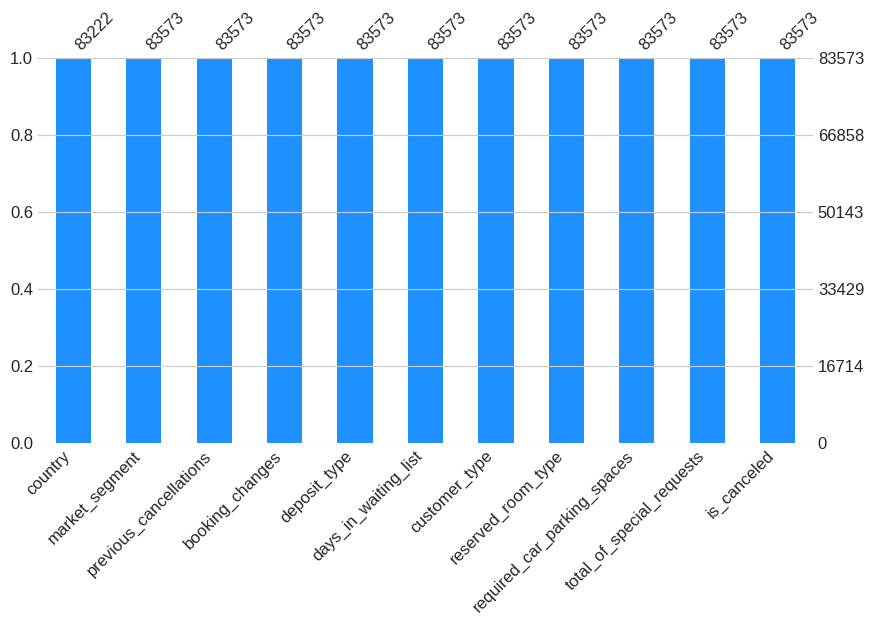

In [ ]:
# Missing value - bar plot
msno.bar(df, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)

Berdasarkan kolom Bar Plot tersebut kolom country memiliki jumlah data yang lebih sedikit dibandingkan kolom-kolom lainnya, sehingga dapat diketahui bahwa kolom country memiliki missing values/data yang hilang.

<Axes: >

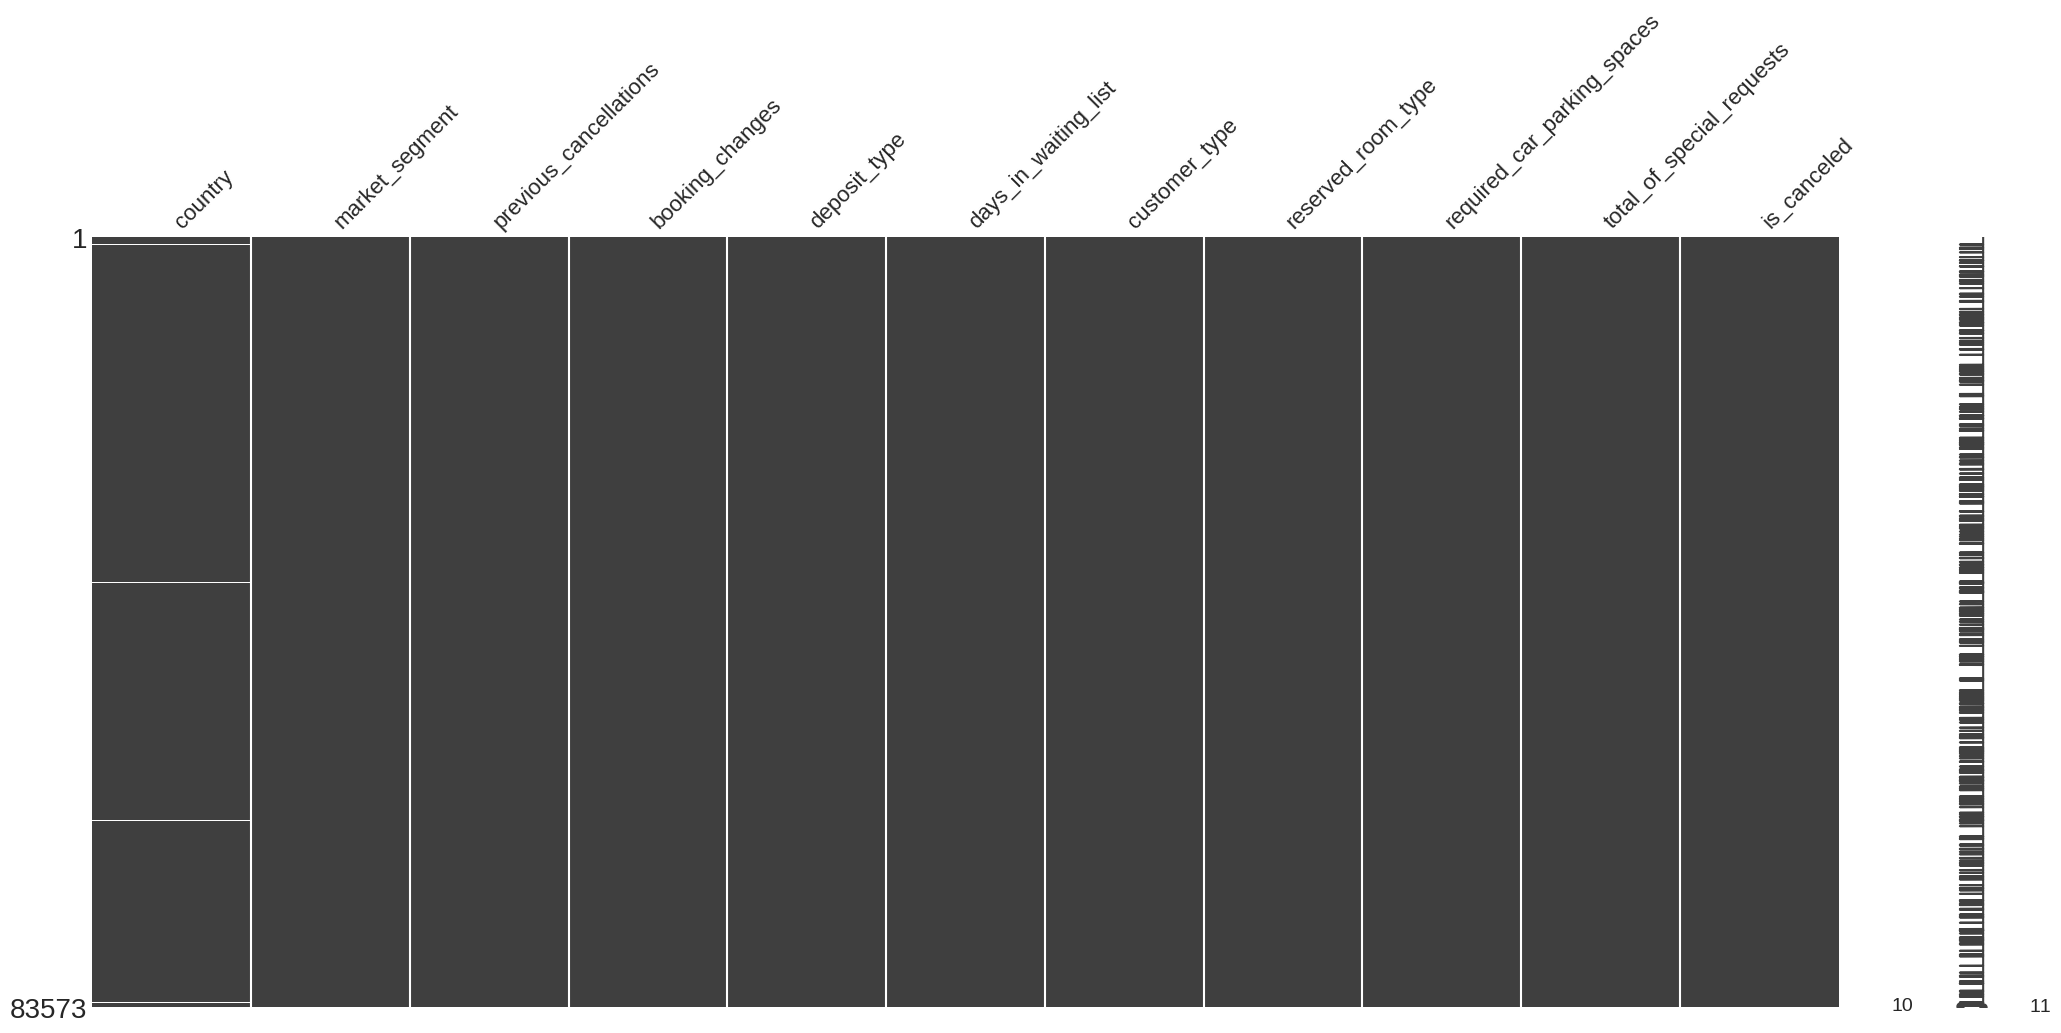

In [ ]:
# Missing value - matrix
msno.matrix(df)

Berdasarkan matrix diatas terlihat bahwa missing value/data yang hilang pada kolom country sedikit acak.

<Axes: >

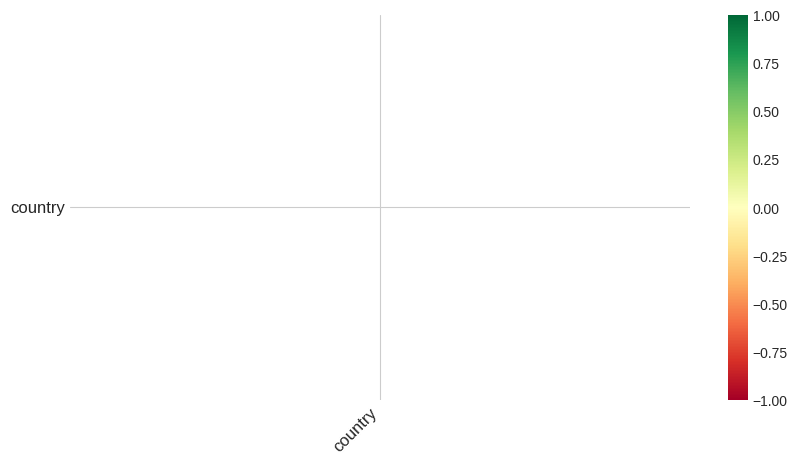

In [ ]:
# Missing value - heatmap
msno.heatmap(df, cmap="RdYlGn", figsize=(10,5), fontsize=12)

Terlihat dari Heatmap tersebut bahwa plot tampil kosong (blank) dan hanya memunculkan kolom country pada sumbu X dan Y. Hal ini menunjukan bahwa tidak ada korelasi missing values yang dapat dihitung.

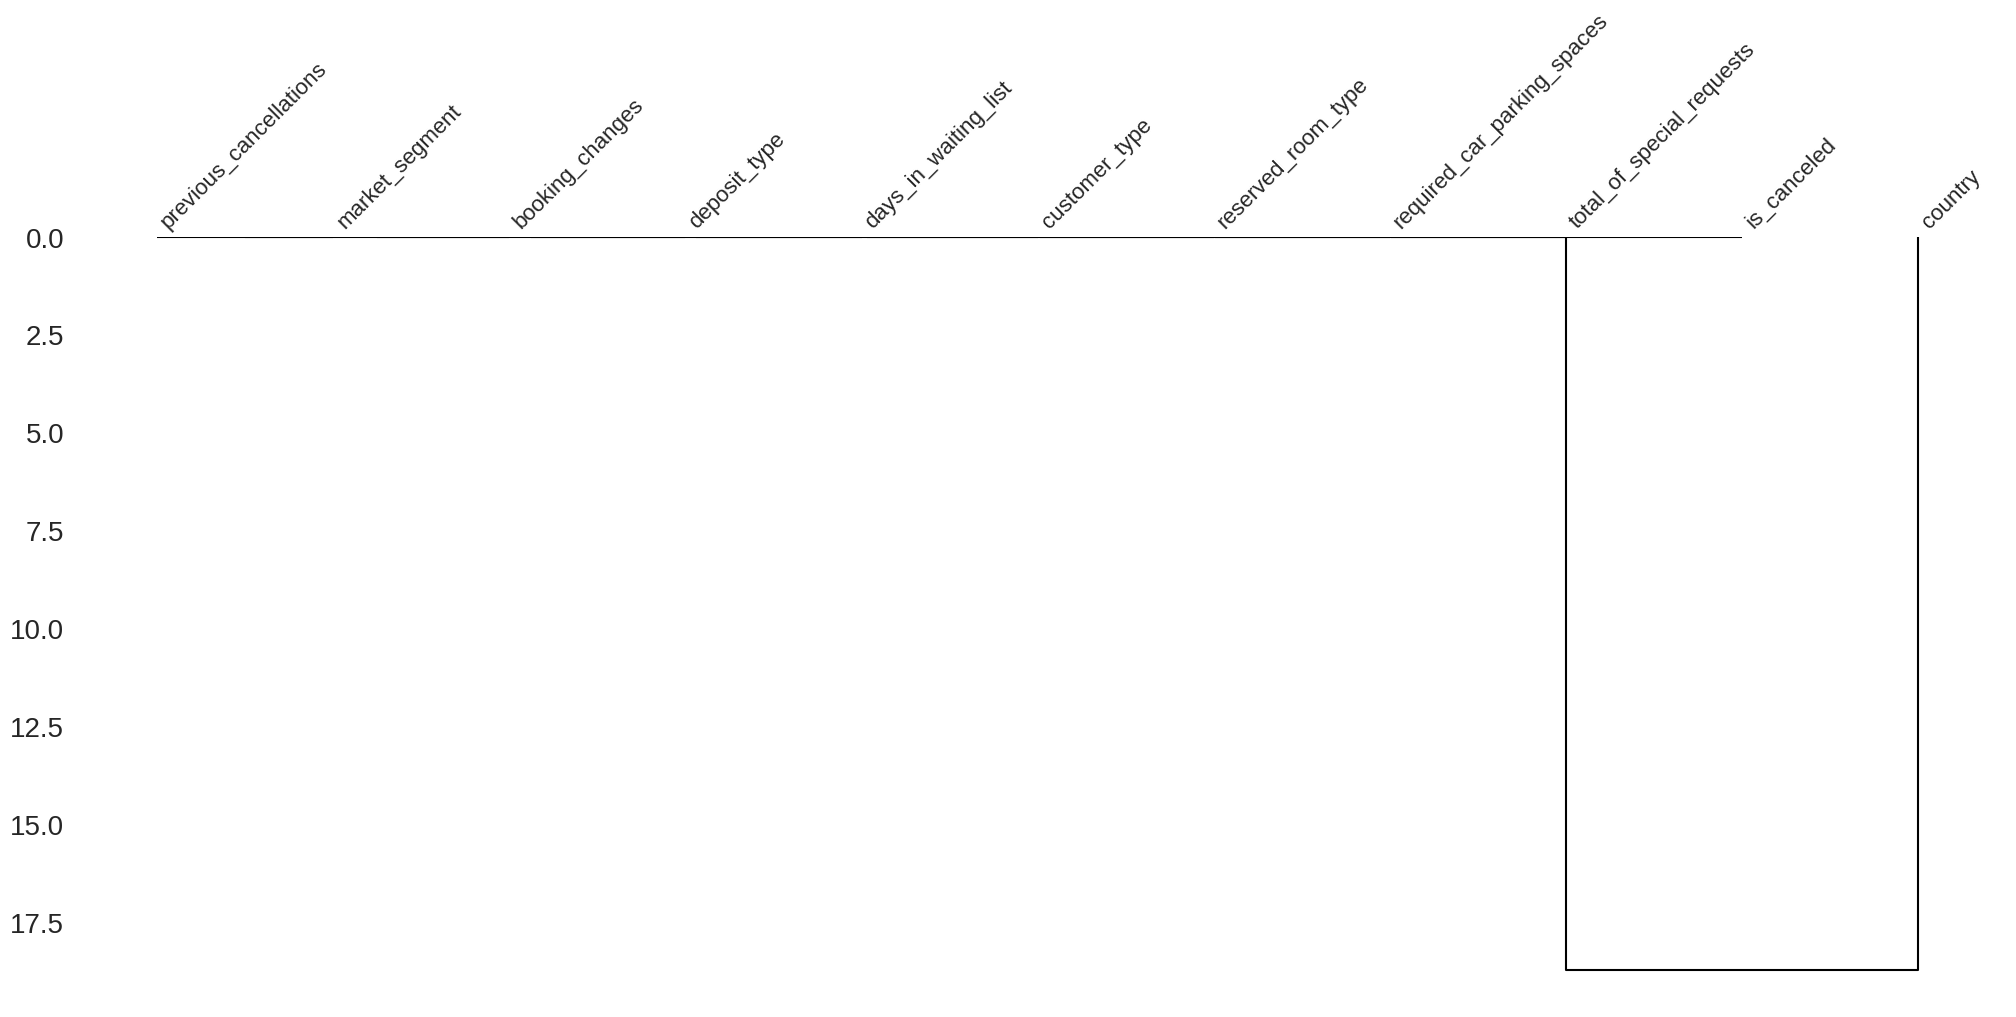

In [ ]:
# Missing value - dendogram
msno.dendrogram(df)
plt.show()

Berdasarkan dendogram tersebut, terlihat kolom previous_cancellations, market_segment, booking_changes, deposit_type, days_in_waiting_list, customer_type, reserved_room_type, required_car_parking_space berada di titik 0 karena tidak mempunyai missing values/data hilang.Sedangkan dapat dilihat kolom country terpisah sendirian yang mana artinya kolom country memiliki missing values dibanding kolom lainnya.

Oleh karena itu, pertama kita check dan analisa lebih lanjut apakah kita dapat mengisi missing value di country dengan informasi "Unknown". Hal ini bertujuan untuk memvalidasi apakah hilangnya data pada kolom negara tersebut terjadi secara acak (random) atau justru mengandung pola perilaku tertentu yang berkaitan dengan target prediksi (is_canceled).

In [ ]:
# Analisis hubungan missing values Country dengan Target (is_canceled)
cancel_rate_missing = df[df['country'].isnull()]['is_canceled'].mean() * 100
cancel_rate_exist = df[df['country'].notnull()]['is_canceled'].mean() * 100

print(f"Persentase Booking batal jika Country KOSONG  : {cancel_rate_missing:.2f}%")
print(f"Persentase Booking batal jika Country ADA     : {cancel_rate_exist:.2f}%")

Persentase Booking batal jika Country KOSONG  : 13.11%
Persentase Booking batal jika Country ADA     : 36.93%


Berdasarkan perbandingan diatas, terlihat pelanggan yang data countrynya kosong justru jauh lebih jarang membatalkan booking dibanding pelanggan yang memiliki data country. Dengan memberi label "Unknown", model Machine Learning nanti akan belajar: "Oh, kalau negaranya 'Unknown', prediksi kemungkinan cancel-nya rendah (cuma 13%)."

Sekarang mari kita cek market_segment, mereka mungkin berasal
dari segmen Corporate atau Complementary yang datanya tidak diinput lengkap di resepsionis tapi pasti datang.

In [ ]:
# Analisis market_segment pada baris dengan country kosong
df_null_country = df[df['country'].isnull()]
print(df_null_country['market_segment'].value_counts())

market_segment
Corporate        124
Direct           122
Online TA         52
Offline TA/TO     45
Complementary      5
Groups             3
Name: count, dtype: int64


Data yang memiliki nilai kosong pada kolom country lalu menghitung dari segmen mana saja booking tersebut berasal. Hasilnya menunjukkan bahwa sebagian besar data country yang hilang berasal dari segmen Corporate dan Direct, sementara segmen lain jumlahnya jauh lebih sedikit. Ini membantu memahami pola missing value sebelum dilakukan imputasi.

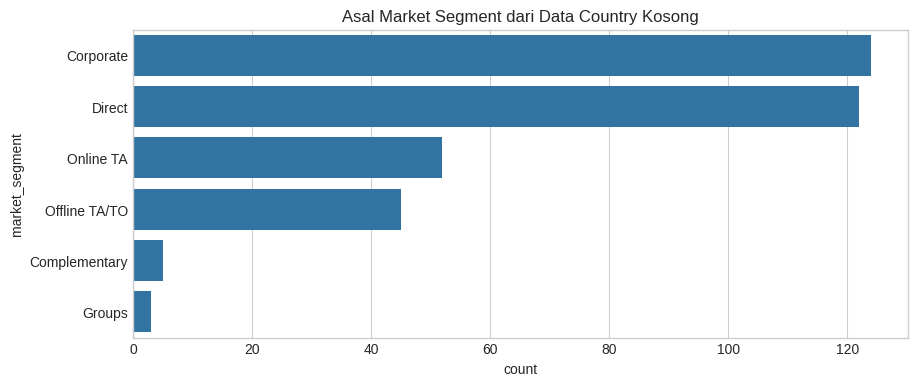

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(y='market_segment', data=df_null_country, order=df_null_country['market_segment'].value_counts().index)
plt.title('Asal Market Segment dari Data Country Kosong')
plt.show()

Berdasarkan analisis mendalam yang telah dilakukan, missing values/data hilang pada kolom country tidak terjadi secara acak, melainkan didominasi pada market_segment 'Corporate' dan 'Direct'. Kelompok data tanpa negara ini memiliki tingkat cancellation rate atau pembatalan yang sangat rendah, yaitu 13.11%, jauh lebih kecil dibandingkan rata-rata pelanggan yang memiliki data country (36.93%). Oleh karena itu, diputuskan untuk melakukan imputasi dengan label kategori baru 'Unknown'. Metode ini dipilih untuk mempertahankan pola perilaku unik tersebut agar model Machine Learning dapat mengenali bahwa pelanggan dengan negara 'Unknown' adalah pelanggan dengan risiko pembatalan yang rendah.

In [ ]:
# Imputasi missing value country dengan label 'Unknown'
df['country'] = df['country'].fillna('Unknown')

print("Jumlah missing values di country sekarang:", df['country'].isnull().sum())
print("Apakah label 'Unknown' sudah masuk?", 'Unknown' in df['country'].values)

Jumlah missing values di country sekarang: 0
Apakah label 'Unknown' sudah masuk? True


Mengisi nilai **country** yang kosong dengan ‘Unknown’ dan memastikan tidak ada nilai kosong yang tersisa.

In [ ]:
# Update setelah imputasi
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2, random_state=42).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,country,object,0,0.0,163,"[GNB, JEY]"
1,market_segment,object,0,0.0,8,"[Online TA, Complementary]"
2,previous_cancellations,int64,0,0.0,15,"[26, 4]"
3,booking_changes,int64,0,0.0,19,"[0, 4]"
4,deposit_type,object,0,0.0,3,"[No Deposit, Non Refund]"
5,days_in_waiting_list,int64,0,0.0,115,"[96, 77]"
6,customer_type,object,0,0.0,4,"[Transient, Group]"
7,reserved_room_type,object,0,0.0,10,"[L, E]"
8,required_car_parking_spaces,int64,0,0.0,5,"[1, 3]"
9,total_of_special_requests,int64,0,0.0,6,"[0, 2]"


Tabel ini menampilkan update ringkasan setiap kolom setelah imputasi, seperti tipe data, jumlah nilai unik, dan contoh sampelnya. Terlihat bahwa semua kolom sudah tidak memiliki nilai null, sehingga data siap digunakan untuk tahap berikutnya.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83573 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


Terlihat sekarang kolom country tidak memiliki missing values/data hilang. Hal ini berarti setiap kolom memiliki jumlah data yang sama dan "Unknown" sudah berhasil sudah masuk ke dataset, sekarang kita lanjut ke tahap Analisa Data.

## Data Analysis

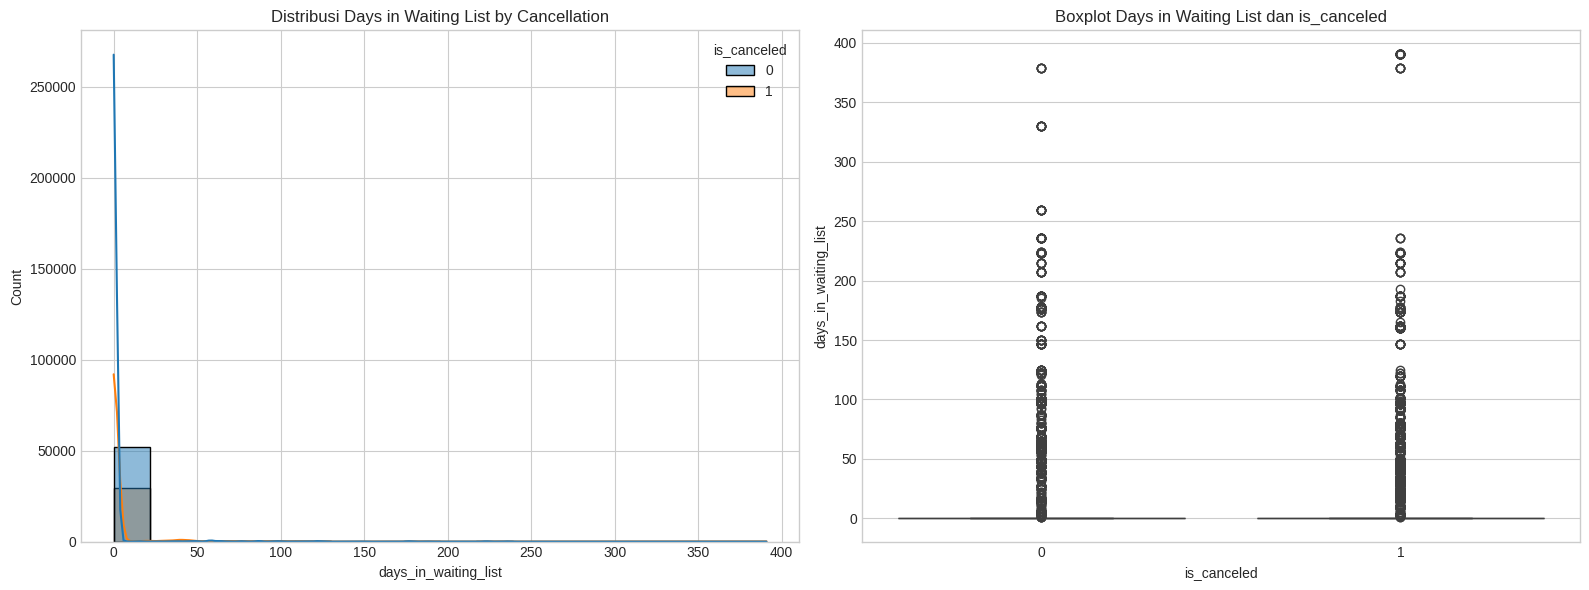

In [ ]:
# Distribusi days_in_waiting_list dan is_canceled
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data=df, x='days_in_waiting_list', hue='is_canceled', kde=True, ax=axes[0])
axes[0].set_title('Distribusi Days in Waiting List by Cancellation')

sns.boxplot(data=df, x='is_canceled', y='days_in_waiting_list', ax=axes[1])
axes[1].set_title('Boxplot Days in Waiting List dan is_canceled')
axes[1].set_xlabel('is_canceled')

plt.tight_layout()
plt.show()

Terlihat histogram di sebelah kiri ada satu batang yang mempresentasikan 0 menjulang tinggi, hal ini menunjukkan mayoritas pelanggan langsung mendapat kamar dan hanya sebagian kecil pelanggan yang harus menunggu atau masuk waiting list.

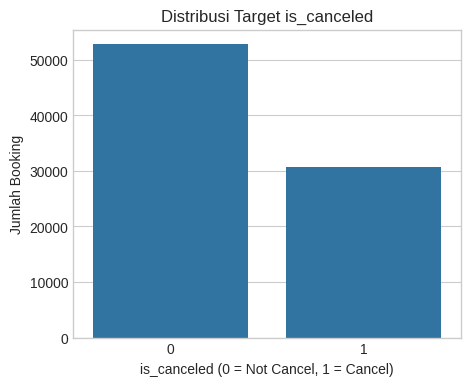

In [ ]:
# Distribusi target
plt.figure(figsize=(5,4))
sns.countplot(x='is_canceled', data=df)
plt.title('Distribusi Target is_canceled')
plt.xlabel('is_canceled (0 = Not Cancel, 1 = Cancel)')
plt.ylabel('Jumlah Booking')
plt.show()

Menunjukkan distribusi kelas pada kolom is_canceled. Terlihat bahwa jumlah booking yang tidak dibatalkan (kelas 0) jauh lebih tinggi dibandingkan booking yang dibatalkan (kelas 1). Perbedaan jumlah ini mengindikasikan adanya ketidakseimbangan kelas pada data, sehingga perlu diperhatikan saat melakukan pemodelan."

In [ ]:
print("Proporsi kelas target (%):")
print(df['is_canceled'].value_counts(normalize=True) * 100)

Proporsi kelas target (%):
is_canceled
0    63.172316
1    36.827684
Name: proportion, dtype: float64


Proporsi pada kolom is_canceled dihitung untuk melihat distribusi kelas target. Hasilnya menunjukkan bahwa sekitar 63% pemesanan tidak dibatalkan dan 37% dibatalkan. Kondisi ini mengindikasikan adanya ketidakseimbangan kelas yang perlu diperhatikan pada tahap pemodelan

In [ ]:
# Cek rata-rata cancel untuk yang masuk waiting list dan tidak
wait_list = df[df['days_in_waiting_list'] > 0]['is_canceled'].mean() * 100
no_wait   = df[df['days_in_waiting_list'] == 0]['is_canceled'].mean() * 100

print(f"Persentase Cancel jika Masuk Waiting List (>0 hari): {wait_list:.2f}%")
print(f"Persentase Cancel jika Tanpa Waiting List (0 hari) : {no_wait:.2f}%")

Persentase Cancel jika Masuk Waiting List (>0 hari): 64.26%
Persentase Cancel jika Tanpa Waiting List (0 hari) : 35.95%


Membandingkan persentase pembatalan antara tamu yang pernah masuk waiting list dan yang tidak. Hasilnya menunjukkan bahwa tamu yang masuk waiting list memiliki tingkat pembatalan jauh lebih tinggi (64.26%) dibanding tamu tanpa waiting list (35.95%).

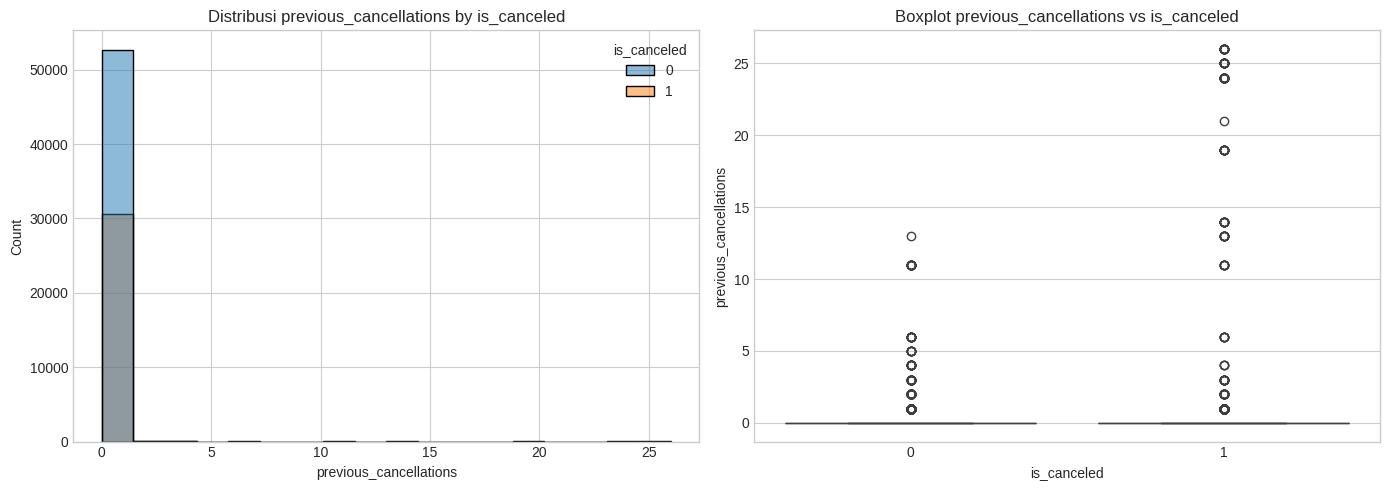

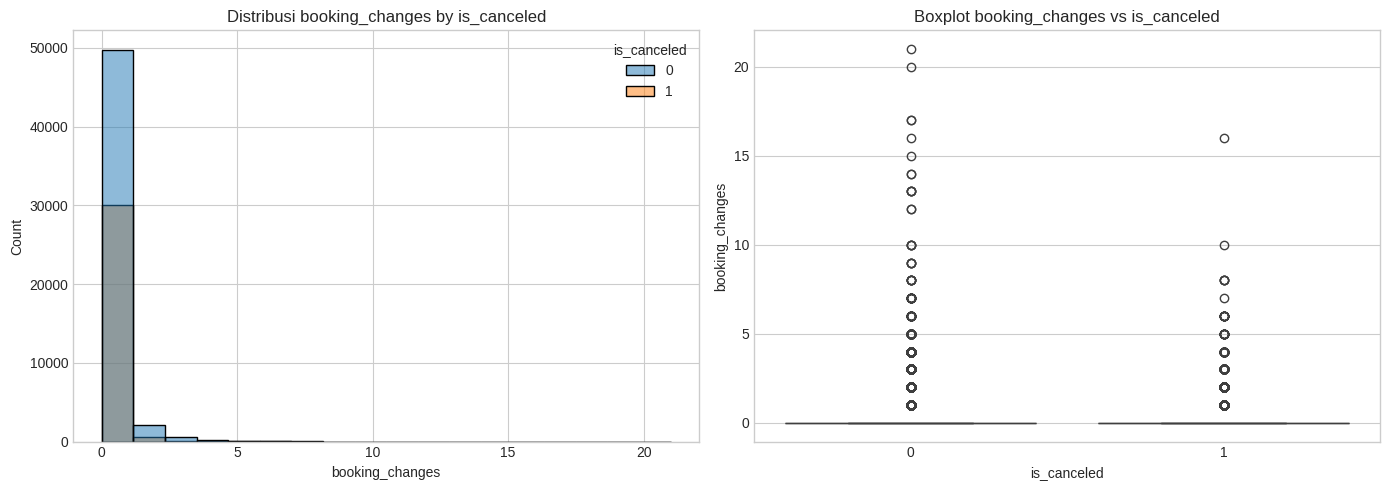

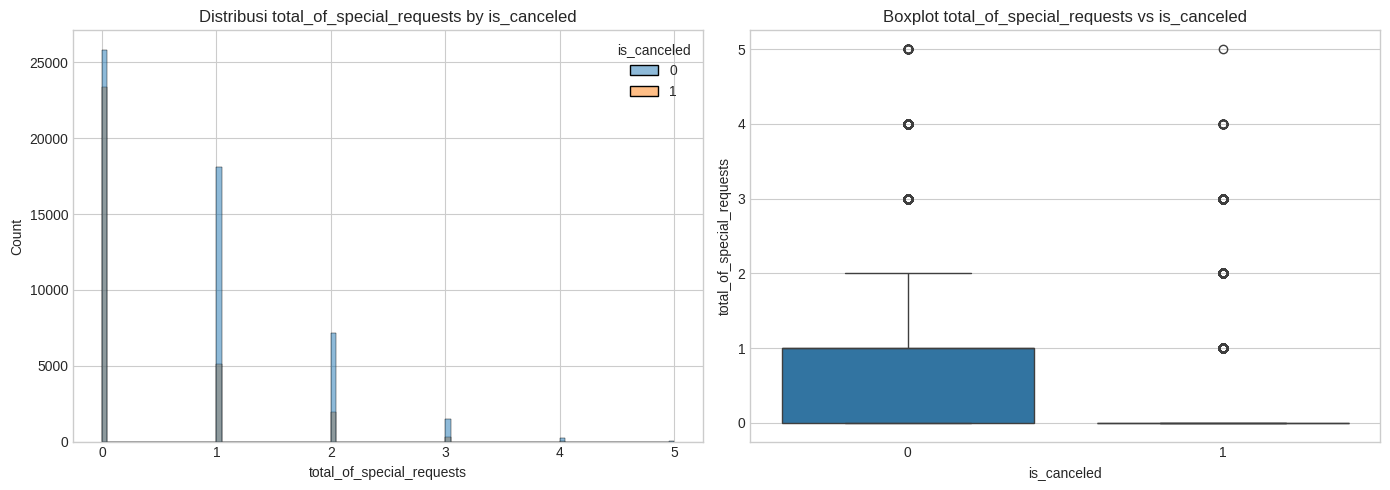

In [ ]:
# Distribusi fitur numerik
num_cols = ['previous_cancellations', 'booking_changes', 'total_of_special_requests']

for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    sns.histplot(data=df, x=col, hue='is_canceled', kde=False, ax=axes[0])
    axes[0].set_title(f'Distribusi {col} by is_canceled')

    sns.boxplot(data=df, x='is_canceled', y=col, ax=axes[1])
    axes[1].set_title(f'Boxplot {col} vs is_canceled')

    plt.tight_layout()
    plt.show()

Histogram dan boxplot menunjukkan bahwa ketiga fitur (previous_cancellations, booking_changes, dan total_of_special_requests) sebagian besar bernilai sangat kecil, sedangkan beberapa data memiliki nilai yang jauh lebih besar sebagai outlier. Kondisi ini menunjukkan bahwa sebaran datanya tidak merata dan perlu diperhatikan saat melakukan pemodelan.

In [ ]:
# Crosstab fitur categorical dan is_canceled
cols_to_analyze = [
    'market_segment',
    'deposit_type',
    'customer_type',
    'previous_cancellations',
    'booking_changes',
    'required_car_parking_spaces',
    'total_of_special_requests'
]

Fitur-fitur tersebut dipilih untuk dianalisis crosstab karena merupakan variabel kategori yang berpotensi memengaruhi pembatalan. Crosstab membantu melihat pola hubungan antara masing-masing fitur dan status is_canceled.

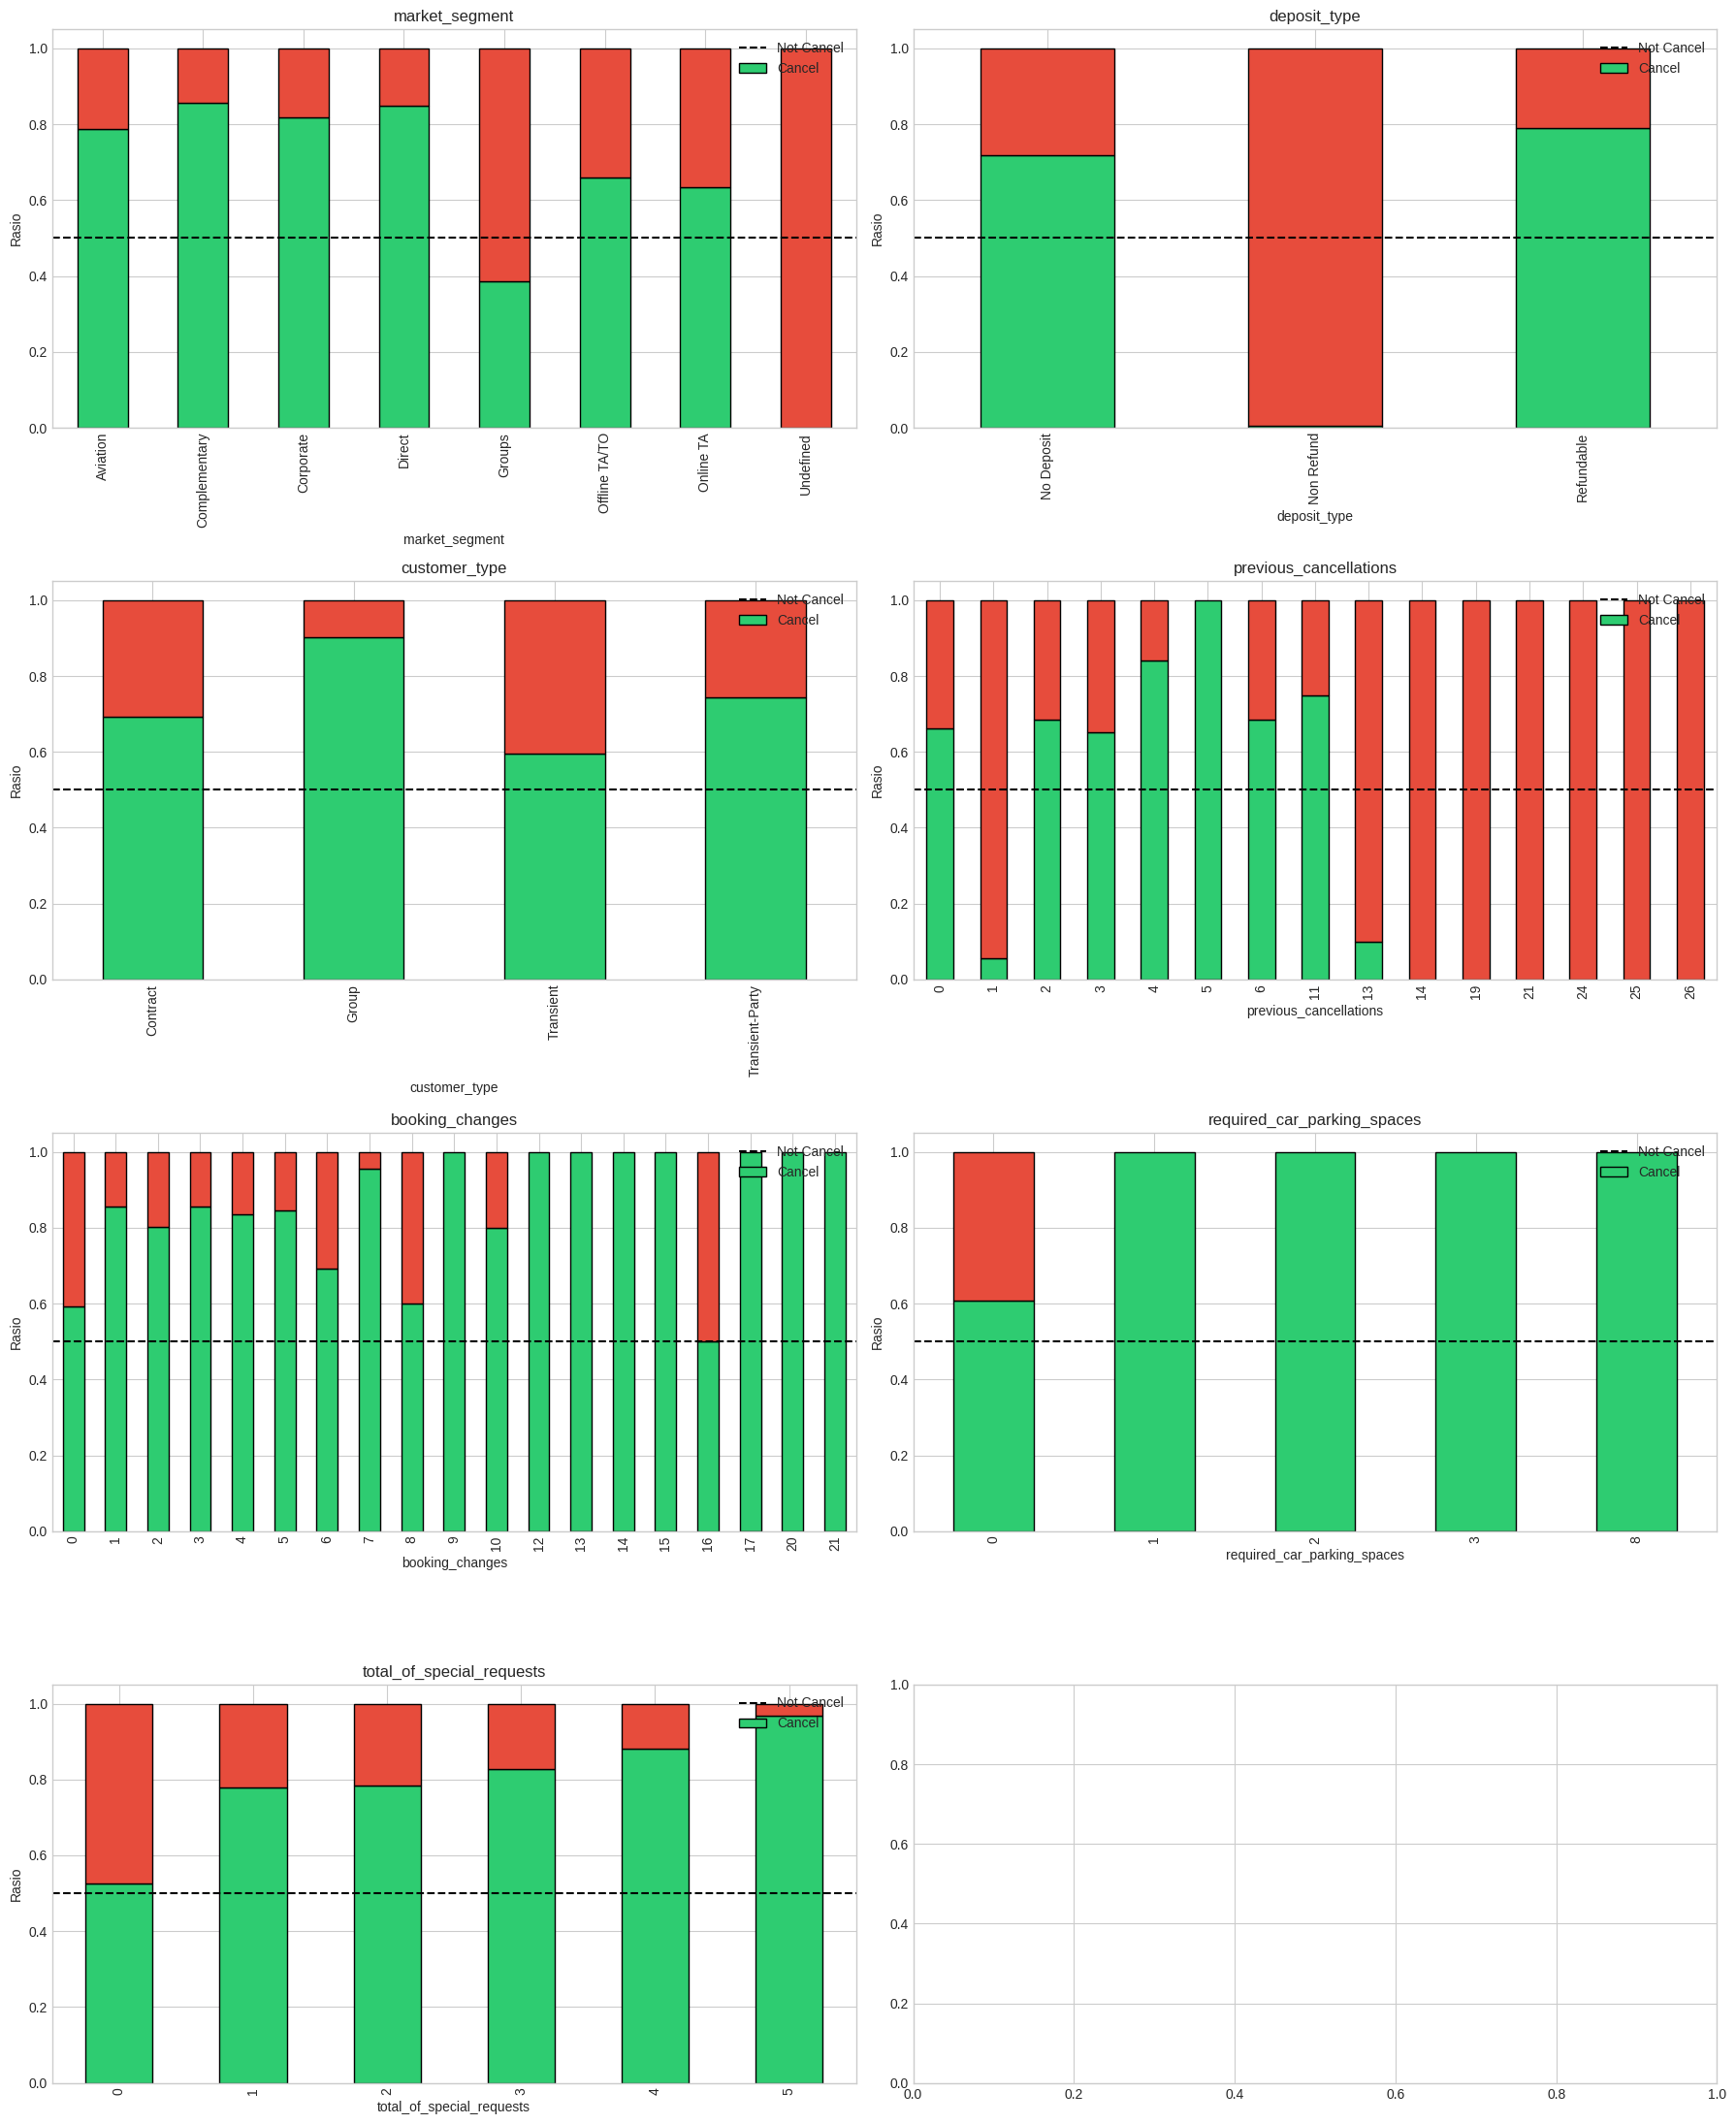

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(18, 22))
axes = axes.flatten()

for i, col in enumerate(cols_to_analyze):
  ct = pd.crosstab(df[col], df['is_canceled'], normalize='index')
  ct.plot(kind='bar', stacked=True, ax=axes[i], color=['#2ecc71', '#e74c3c'], edgecolor='black')

  axes[i].set_title(col)
  axes[i].set_ylabel('Rasio')
  axes[i].axhline(0.5, color='black', linestyle='--')
  axes[i].legend(['Not Cancel', 'Cancel'], loc='upper right')

plt.tight_layout()
plt.show()

Visualisasi Grafik diatas, menunjukkan perbandingan proporsi pemesanan yang dibatalkan dan yang tidak pada setiap kategori fitur. Setiap kolom menunjukkan rasio, dengan garis 0.5 sebagai batas untuk melihat apakah suatu kategori memiliki kecenderungan pembatalan di atas atau di bawah 50%. Kategori dengan jumlah data sangat sedikit bisa menghasilkan proporsi yang kurang akurat.

In [ ]:
# Analisis country dan is_canceled (top 10)
country_analysis = df.groupby('country')['is_canceled'].agg(['count', 'mean'])
country_analysis.columns = ['Total Tamu', 'Persentase Cancel']
country_analysis['Persentase Cancel'] = country_analysis['Persentase Cancel'] * 100
top_countries = country_analysis.sort_values(by='Total Tamu', ascending=False).head(10)

print("Analisis Kecenderungan Cancel Berdasarkan Negara (Top 10) ")
display(top_countries)

Analisis Kecenderungan Cancel Berdasarkan Negara (Top 10) 


,Total Tamu,Persentase Cancel
country,,
PRT,34097,56.183828
GBR,8495,20.294291
FRA,7307,18.694403
ESP,5996,25.783856
DEU,5116,16.497263
ITA,2658,35.176825
IRL,2340,24.615385
BEL,1648,19.781553
BRA,1553,37.604636


Dataset diambil dari Google Drive lalu dikelompokkan berdasarkan `country` untuk menghitung jumlah tamu dan persentase pembatalan. Data kemudian diurutkan sehingga terlihat 10 negara dengan pemesanan terbanyak beserta tingkat pembatalannya. Dari hasilnya, negara seperti PRT, GBR, dan FRA menonjol dalam jumlah tamu, sekaligus menunjukkan variasi persentase pembatalan yang dapat menjadi perhatian dalam analisis.


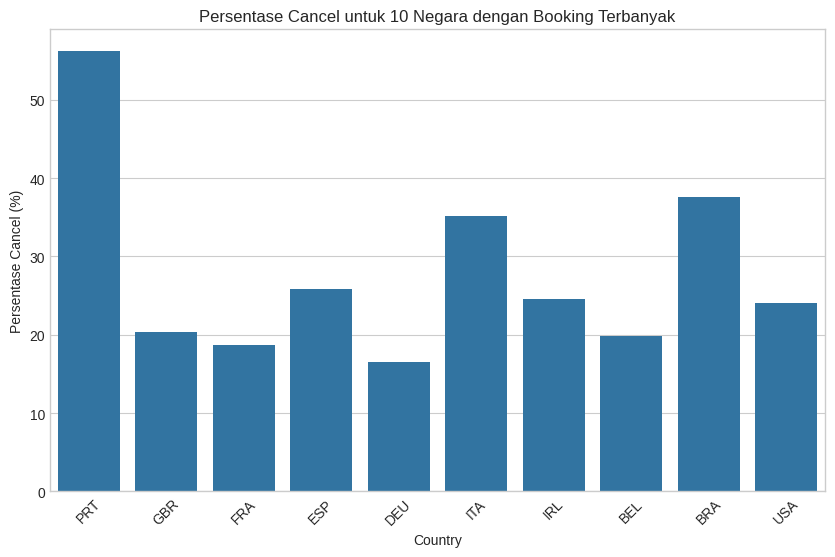

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_countries.reset_index(), x='country', y='Persentase Cancel')
plt.xticks(rotation=45)
plt.title('Persentase Cancel untuk 10 Negara dengan Booking Terbanyak')
plt.ylabel('Persentase Cancel (%)')
plt.xlabel('Country')
plt.show()

Grafik tersebut, menampilkan Persentase Cancel dari 10 negara dengan jumlah booking terbanyak. Grafik tersebut, terlihat bahwa PRT memiliki tingkat pembatalan paling tinggi, sementara negara seperti FRA dan DEU cenderung lebih rendah. Plot ini membantu melihat negara mana yang lebih berisiko melakukan pembatalan dibanding negara lainnya.

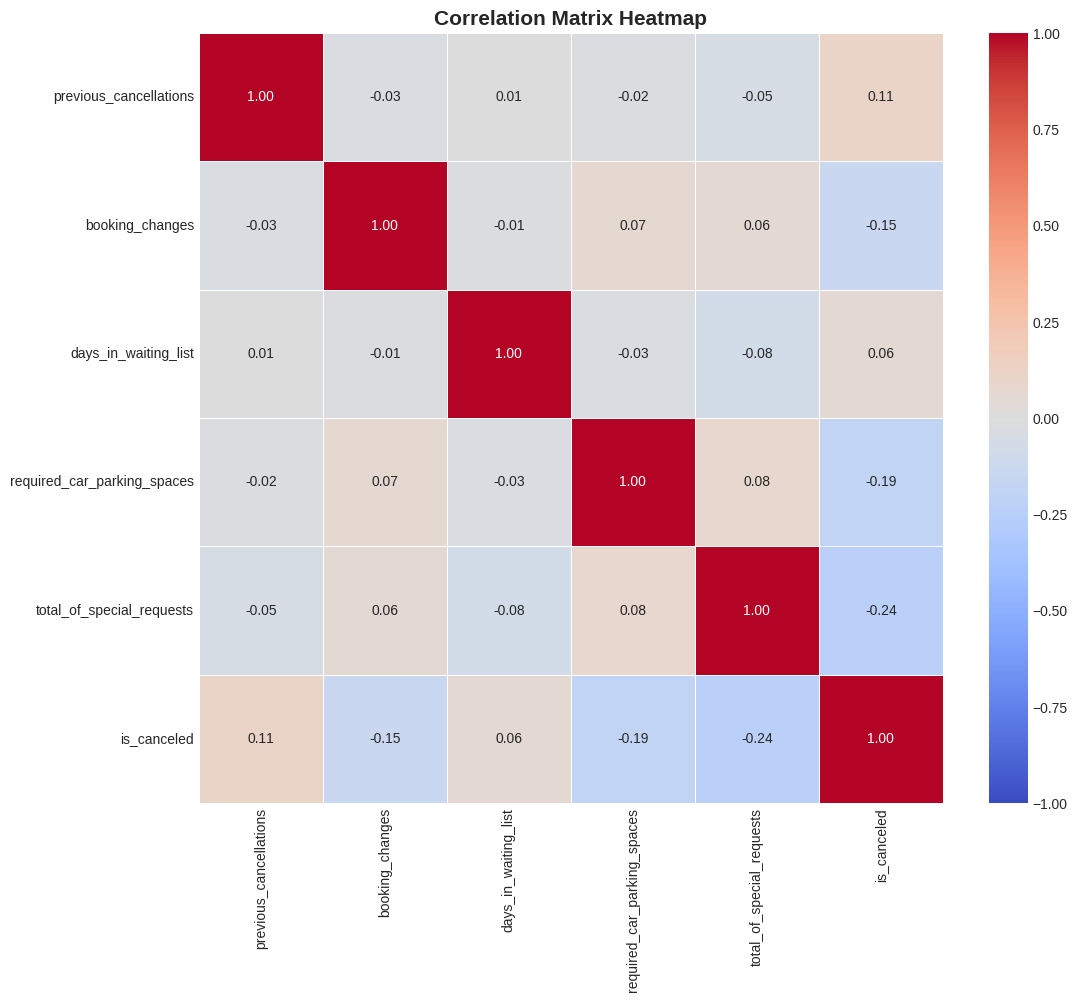

In [ ]:
# Correlation heatmap variabel numerik
df_numeric = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = df_numeric.corr()

plt.figure(figsize =(12,10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Correlation Matrix Heatmap', fontsize=15, fontweight='bold')
plt.show()

**Heatmap** tersebut menampilkan korelasi antar fitur numerik dataset. NNilai korelasi dihitung menggunakan **Correlation()** dan divisualisasikan dengan **sns.heatmap** untuk melihat hubungan antar variabel. Hasil korelasinya menunjukkan bahwa kebanyakan hubungan antar variabel yang bersifat lemah, termasuk korelasi "is_canceled". Beberapa fitur seperti previous_cancellations, booking_changes, dan total_of_special_requests hanya memiliki pengaruh kecil. Kondisi ini mengindikasikan bahwa pembatalan reservasi tidak bergantung pada satu fitur tertentu, melainkan dipengaruhi oleh berbagai faktor secara bersamaan.

## Data Preparation

In [ ]:
df.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


In [ ]:
# Simplify country
top_10_percentage = df['country'].value_counts(normalize=True).head(10).sum() * 100
print(f"Top 10 negara menguasai {top_10_percentage:.2f}% dari total seluruh data.")

top_10_countries = df['country'].value_counts().head(10).index.tolist()

Top 10 negara menguasai 84.58% dari total seluruh data.


Pada tahap Data Preparation ini, kami melakukan Feature Reduction terhadap kolom country yang memiliki kardinalitas tinggi (163 negara unik). Berdasarkan analisis, ditemukan bahwa 10 negara teratas saja sudah mencakup 84.58% dari total populasi data.

In [ ]:
def simplify_country(country):
    if country in top_10_countries:
        return country
    else:
        return 'Other'

df['country'] = df['country'].apply(simplify_country)
print("\nDistribusi country setelah disederhanakan:")
print(df['country'].value_counts())


Distribusi country setelah disederhanakan:
country
PRT      34097
Other    12891
GBR       8495
FRA       7307
ESP       5996
DEU       5116
ITA       2658
IRL       2340
BEL       1648
BRA       1553
USA       1472
Name: count, dtype: int64


Tahap Menyederhanakan kategori negara dengan menampilkan 10 negara dengan jumlah pemesanan paling banyak, sedangkan negara lainnya digabungkan ke dalam kategori Other. Cara ini membantu membuat analisis lebih jelas dan menghindari kategori negara yang jumlah datanya terlalu sedikit sehingga tidak terlalu berpengaruh.

In [ ]:
# Feature engineering
df['has_waitlist'] = (df['days_in_waiting_list'] > 0).astype(int)
df['has_prev_cancel'] = (df['previous_cancellations'] > 0).astype(int)
df['has_special_request'] = (df['total_of_special_requests'] > 0).astype(int)

Bagian ini membuat tiga fitur biner baru : has_waitlist, has_prev_cancel, dan has_special_request yang bernilai 1 jika kondisinya terpenuhi (misalnya ada waiting list, atau ada special request), dan 0 jika tidak.

In [ ]:
# Fitur hasil feature engineering
df[['days_in_waiting_list', 'has_waitlist',
    'previous_cancellations', 'has_prev_cancel',
    'total_of_special_requests', 'has_special_request']].head()

,days_in_waiting_list,has_waitlist,previous_cancellations,has_prev_cancel,total_of_special_requests,has_special_request
0,0,0,0,0,0,0
1,0,0,0,0,2,1
2,0,0,0,0,2,1
3,0,0,0,0,1,1
4,0,0,0,0,2,1


In [ ]:
x = df.drop(columns=['is_canceled'])
y = df['is_canceled']

print(x.shape)
print(y.shape)

(83573, 13)
(83573,)


Memisahkan fitur dan target. Hasilnya, X memiliki 10 fitur dengan 83.573 baris, sedangkan y berisi 83.573 label pembatalan.

In [ ]:
# Menentukan fitur numerik dan kategorikal
numeric_features = [
    'previous_cancellations',
    'booking_changes',
    'days_in_waiting_list',
    'required_car_parking_spaces',
    'total_of_special_requests',
    'has_waitlist',
    'has_prev_cancel',
    'has_special_request'
]

categorical_features = [
    'country',
    'market_segment',
    'deposit_type',
    'customer_type',
    'reserved_room_type'
]

Memisahkan fitur menjadi dua kelompok : numeric_features berisi kolom dengan nilai angka yang akan diproses menggunakan teknik khusus data numerik (seperti scaling), sedangkan categorical_features berisi kolom kategori yang nantinya akan diolah dengan metode seperti one-hot encoding. Pemisahan ini penting agar setiap jenis data mendapatkan proses preprocessing yang sesuai sebelum masuk ke model.

In [ ]:
# Train-test split (stratified)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2025, stratify=y)

print("\nShape x_train:", x_train.shape)
print("Shape x_test :", x_test.shape)


Shape x_train: (66858, 13)
Shape x_test : (16715, 13)


Membagi data menjadi train 80% dan test 20% dengan metode stratified. Hasilnya, train memiliki 66.858 baris dan test memiliki 16.715 baris, masing-masing dengan 13 fitur.

In [ ]:
print("Distribusi target train (%):")
print(y_train.value_counts(normalize=True) * 100)
print("\nDistribusi target test (%):")
print(y_test.value_counts(normalize=True) * 100)

Distribusi target train (%):
is_canceled
0    63.172694
1    36.827306
Name: proportion, dtype: float64

Distribusi target test (%):
is_canceled
0    63.170805
1    36.829195
Name: proportion, dtype: float64


Distribusi pada data train dan test tetap seimbang, sekitar 63% pemesanan tidak dibatalkan dan 37% dibatalkan. Hal ini menunjukkan bahwa pembagian data berhasil mempertahankan proporsi target asli.

In [ ]:
# ColumnTransformer: scaling dan one hot
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'
)

ColumnTransformer ini menyiapkan data sebelum masuk ke model dengan menstandarkan fitur numerik dan mengubah fitur kategorikal menjadi one-hot, sehingga semua fitur memiliki format yang seragam dan siap digunakan tanpa masalah perbedaan skala maupun tipe data.

In [ ]:
# Hasil scaling dan one hot
x_train_transformed = transformer.fit_transform(x_train)
print("\nsetelah preprocessing:", x_train_transformed.shape)


setelah preprocessing: (66858, 38)


Setelah proses preprocessing dilakukan, jumlah datanya masih sama (66.858 baris), tetapi kolomnya jadi lebih banyak, dari 10 kolom menjadi 35 kolom.

In [ ]:
feature_names = transformer.get_feature_names_out()
print("\nnama fitur setelah encoding:")
print(feature_names[:20])


nama fitur setelah encoding:
['num__previous_cancellations' 'num__booking_changes'
 'num__days_in_waiting_list' 'num__required_car_parking_spaces'
 'num__total_of_special_requests' 'num__has_waitlist'
 'num__has_prev_cancel' 'num__has_special_request' 'onehot__country_BRA'
 'onehot__country_DEU' 'onehot__country_ESP' 'onehot__country_FRA'
 'onehot__country_GBR' 'onehot__country_IRL' 'onehot__country_ITA'
 'onehot__country_Other' 'onehot__country_PRT' 'onehot__country_USA'
 'onehot__market_segment_Complementary' 'onehot__market_segment_Corporate']


Menampilkan daftar fitur baru setelah proses preprocessing. Fitur numerik tetap ada, sedangkan fitur kategorikal diubah menjadi banyak kolom baru melalui one-hot encoding. Hasilnya, setiap kategori seperti negara atau market segment muncul sebagai kolom terpisah, misalnya onehot__market_segment_Complementary. Daftar ini membantu memastikan bahwa semua fitur sudah dikonversi dan siap digunakan oleh model.

In [ ]:
x_train_array = x_train_transformed.toarray() if hasattr(x_train_transformed, "toarray") else x_train_transformed

In [ ]:
testing = pd.DataFrame(x_train_array, columns=feature_names)
testing.head()

,num__previous_cancellations,num__booking_changes,num__days_in_waiting_list,num__required_car_parking_spaces,num__total_of_special_requests,num__has_waitlist,num__has_prev_cancel,num__has_special_request,onehot__country_BRA,onehot__country_DEU,onehot__country_ESP,onehot__country_FRA,onehot__country_GBR,onehot__country_IRL,onehot__country_ITA,onehot__country_Other,onehot__country_PRT,onehot__country_USA,onehot__market_segment_Complementary,onehot__market_segment_Corporate,onehot__market_segment_Direct,onehot__market_segment_Groups,onehot__market_segment_Offline TA/TO,onehot__market_segment_Online TA,onehot__deposit_type_Non Refund,onehot__deposit_type_Refundable,onehot__customer_type_Group,onehot__customer_type_Transient,onehot__customer_type_Transient-Party,onehot__reserved_room_type_B,onehot__reserved_room_type_C,onehot__reserved_room_type_D,onehot__reserved_room_type_E,onehot__reserved_room_type_F,onehot__reserved_room_type_G,onehot__reserved_room_type_H,onehot__reserved_room_type_L,onehot__reserved_room_type_P
0,-0.104057,-0.341285,-0.13184,-0.257066,1.788869,-0.179414,-0.240164,1.194150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.104057,-0.341285,-0.13184,-0.257066,-0.721789,-0.179414,-0.240164,-0.837415,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.104057,-0.341285,-0.13184,-0.257066,0.533540,-0.179414,-0.240164,1.194150,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.104057,-0.341285,-0.13184,-0.257066,0.533540,-0.179414,-0.240164,1.194150,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.104057,-0.341285,-0.13184,-0.257066,0.533540,-0.179414,-0.240164,1.194150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Hasil preprocessing (scaling pada data numerik dan one-hot encoding untuk data kategorikal). Tampilan diatas, membantu untuk memastikan bahwa semua fitur telah diolah dengan benar sebelum digunakan untuk proses pelatihan model selanjutnya.

## Modeling & Evaluation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83573 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
 11  has_waitlist                 83573 non-null  int64 
 12  has_prev_cancel              83573 non-null  int64 
 13  has_special_request          83

Dataset tersebut memiliki 83.573 baris dan 11 kolom, Enam kolom bertipe numerik (int64) dan lima kolom bertipe kategorikal (object). Tahap ini membantu untuk memastikan bahwa data lengkap serta mengetahui jenis tipe data yang akan diproses pada tahap preprocessing dan pemodelan.

In [ ]:
# Menentukan model dasar
logreg = LogisticRegression(max_iter=1000)
knn    = KNeighborsClassifier()
dt     = DecisionTreeClassifier(random_state=2025)
rf     = RandomForestClassifier(random_state=2025)
xgb    = XGBClassifier(
    random_state=2025,
    eval_metric='logloss',
    use_label_encoder=False
)
lgbm   = lgb.LGBMClassifier(random_state=2025)

In [ ]:
models = [logreg, knn, dt, rf, xgb, lgbm]
model_names = [
    'Logistic Regression',
    'KNN',
    'Decision Tree',
    'Random Forest',
    'XGBoost',
    'LightGBM'
]

Pada tahap pemodelan, kami menggunakan enam model klasifikasi yang berbeda, yaitu Logistic Regression, KNN, Decision Tree, Random Forest, XGBoost, dan LightGBM. Hal ini bertujuan untuk mengidentifikasi model dengan performa prediksi paling optimal.

### Model Benchmarking : K-Fold


In [ ]:
mean_scores = []
std_scores  = []

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2025)

for mdl in models:
    estimator = Pipeline(steps=[
        ('preprocess', transformer),
        ('model', mdl)
    ])

    cv_scores = cross_val_score(estimator, x_train, y_train, cv=skfold, scoring='roc_auc')

    mean_scores.append(cv_scores.mean())
    std_scores.append(cv_scores.std())

df_cv = (
    pd.DataFrame({
        'model': model_names,
        'mean_roc_auc': mean_scores,
        'sdev': std_scores
    })
    .set_index('model')
    .sort_values(by='mean_roc_auc', ascending=False)
)

print(" Hasil K-Fold ROC AUC di Data Train ")
display(df_cv)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:14:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:14:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:14:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:14:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:14:25] WARNING: /w

[LightGBM] [Info] Number of positive: 19698, number of negative: 33788
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 53486, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368283 -> initscore=-0.539589
[LightGBM] [Info] Start training from score -0.539589


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 19697, number of negative: 33789
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006597 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 53486, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368265 -> initscore=-0.539669
[LightGBM] [Info] Start training from score -0.539669


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 19697, number of negative: 33789
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 53486, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368265 -> initscore=-0.539669
[LightGBM] [Info] Start training from score -0.539669


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 19698, number of negative: 33789
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 53487, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368276 -> initscore=-0.539618
[LightGBM] [Info] Start training from score -0.539618


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 19698, number of negative: 33789
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 201
[LightGBM] [Info] Number of data points in the train set: 53487, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368276 -> initscore=-0.539618
[LightGBM] [Info] Start training from score -0.539618
 Hasil K-Fold ROC AUC di Data Train 


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,mean_roc_auc,sdev
model,,
XGBoost,0.892371,0.002997
LightGBM,0.892202,0.002860
Random Forest,0.887086,0.002772
Decision Tree,0.882000,0.002831
Logistic Regression,0.866344,0.003896
KNN,0.847142,0.005239


Kami mengevaluasi model menggunakan metode Stratified 5-Fold Cross-Validation dan berdasarkan metrik ROC-AUC, model XGBoost menjadi model paling optimal dengan skor rata-rata 0.892, diikuti model LightGBM, Random Forest dan seterusnya.

### Model Benchmarking : Test Data

In [ ]:
# Evaluasi test set
def y_pred_func(model_obj):
    estimator = Pipeline(steps=[
        ('preprocess', transformer),
        ('model', model_obj)
    ])

    estimator.fit(x_train, y_train)
    y_pred = estimator.predict(x_test)
    return estimator, y_pred

score_roc_auc = []
for mdl, name in zip(models, model_names):
    estimator, y_pred = y_pred_func(mdl)
    y_proba = estimator.predict_proba(x_test)[:, 1]
    score_roc_auc.append(roc_auc_score(y_test, y_proba))

    print(f"\n {name} ")
    print(classification_report(y_test, y_pred))

df_test = (
    pd.DataFrame({
        'model': model_names,
        'roc_auc score': score_roc_auc
    })
    .set_index('model')
    .sort_values(by='roc_auc score', ascending=False)
)

print("\n Hasil ROC AUC di Data Test ")
display(df_test)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



 Logistic Regression 
              precision    recall  f1-score   support

           0       0.79      0.90      0.84     10559
           1       0.78      0.60      0.68      6156

    accuracy                           0.79     16715
   macro avg       0.79      0.75      0.76     16715
weighted avg       0.79      0.79      0.78     16715



/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



 KNN 
              precision    recall  f1-score   support

           0       0.81      0.86      0.84     10559
           1       0.73      0.66      0.70      6156

    accuracy                           0.79     16715
   macro avg       0.77      0.76      0.77     16715
weighted avg       0.78      0.79      0.78     16715



/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



 Decision Tree 
              precision    recall  f1-score   support

           0       0.84      0.87      0.85     10559
           1       0.76      0.71      0.73      6156

    accuracy                           0.81     16715
   macro avg       0.80      0.79      0.79     16715
weighted avg       0.81      0.81      0.81     16715



/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



 Random Forest 
              precision    recall  f1-score   support

           0       0.83      0.87      0.85     10559
           1       0.76      0.70      0.73      6156

    accuracy                           0.81     16715
   macro avg       0.80      0.79      0.79     16715
weighted avg       0.81      0.81      0.81     16715



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:16:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



 XGBoost 
              precision    recall  f1-score   support

           0       0.83      0.88      0.86     10559
           1       0.77      0.70      0.73      6156

    accuracy                           0.81     16715
   macro avg       0.80      0.79      0.79     16715
weighted avg       0.81      0.81      0.81     16715

[LightGBM] [Info] Number of positive: 24622, number of negative: 42236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 66858, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368273 -> initscore=-0.539633
[LightGBM] [Info] Start training from score -0.539633


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 LightGBM 
              precision    recall  f1-score   support

           0       0.83      0.88      0.86     10559
           1       0.77      0.69      0.73      6156

    accuracy                           0.81     16715
   macro avg       0.80      0.79      0.79     16715
weighted avg       0.81      0.81      0.81     16715


 Hasil ROC AUC di Data Test 


,roc_auc score
model,
XGBoost,0.892718
LightGBM,0.892446
Random Forest,0.888459
Decision Tree,0.884066
Logistic Regression,0.869250
KNN,0.851998


Untuk memvalidasi kemampuan generalisasi model, dilakukan pengujian akhir menggunakan test data atau data uji. Hasilnya menunjukkan model XGBoost masih menjadi yang tertinggi dengan skor ROC-AUC sebesar 0.8927. Namun, meski XGBoost menghasilkan skor ROC-AUC sedikit lebih tinggi dibanding LightGBM, kami memutuskan untuk melanjutkan tahap optimasi menggunakan LightGBM. Keputusan ini diambil dengan pertimbangan efisiensi komputasi, di mana LightGBM menawarkan kecepatan pelatihan (training speed) hingga 7x lebih cepat dibanding XGBoost dengan konsumsi memori yang jauh lebih rendah. Efisiensi ini krusial mengingat tahap selanjutnya melibatkan proses Hyperparameter Tuning yang membutuhkan ratusan iterasi.

In [ ]:
# Perhitungan metrik train & validasi (train_error & val_error)
def calc_train_error(X_train, y_train, model):
    y_pred = model.predict(X_train)
    y_proba = model.predict_proba(X_train)

    accuracy = accuracy_score(y_train, y_pred)
    f1       = f1_score(y_train, y_pred, average='macro')
    roc_auc  = roc_auc_score(y_train, y_proba[:, 1])
    recall   = recall_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    report   = classification_report(y_train, y_pred)

    return {
        'report': report,
        'f1': f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }


def calc_validation_error(X_val, y_val, model):
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    f1       = f1_score(y_val, y_pred, average='macro')
    roc_auc  = roc_auc_score(y_val, y_proba[:, 1])
    recall   = recall_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    report   = classification_report(y_val, y_pred)

    return {
        'report': report,
        'f1': f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }


def calc_metrics(X_train, y_train, X_val, y_val, model):
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    val_error   = calc_validation_error(X_val, y_val, model)
    return train_error, val_error

Untuk mempermudah proses analisis, kami membuat mekanisme evaluasi yang bertugas melatih model sekaligus menghitung skor Akurasi, F1-Score,ROC-AUC, Recall dan Precision. Tujuannya adalah untuk membandingkan kedua hasil tersebut secara langsung, sehingga kita bisa dengan cepat mendeteksi apakah model benar-benar pintar atau hanya sekadar menghafal (overfitting).

In [ ]:
# Menentukan K-Fold
K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=2025)

data   = x_train.copy()
target = y_train.copy()

train_errors_without_oversampling = []
val_errors_without_oversampling   = []

train_errors_with_oversampling = []
val_errors_with_oversampling   = []

Bagian tersebut menyiapkan proses 10-fold Stratified Cross-Validation, yaitu membagi data train menjadi 10 bagian dengan proporsi kelas yang tetap seimbang pada setiap fold. Data x_train dan y_train disalin agar aman digunakan selama eksperimen. Empat list kosong juga dibuat untuk menyimpan hasil evaluasi, baik untuk model tanpa oversampling maupun dengan oversampling, pada data train dan validation. Struktur ini digunakan untuk membandingkan performa model di tiap fold.

In [ ]:
# Training & evaluasi LightGBM tanpa dan dengan RandomOverSampler (K-Fold)
for train_index, val_index in kf.split(data, target):

    # Split data fold train dan validasi
    X_tr, X_val = data.iloc[train_index], data.iloc[val_index]
    y_tr, y_val = target.iloc[train_index], target.iloc[val_index]

    # a. Tanpa oversampling
    lgbm_base = lgb.LGBMClassifier(random_state=2025)

    estimator_no_ros = Pipeline(steps=[
        ('preprocess', transformer),
        ('model', lgbm_base)
    ])

    tr_err_no, val_err_no = calc_metrics(X_tr, y_tr, X_val, y_val, estimator_no_ros)

    train_errors_without_oversampling.append(tr_err_no)
    val_errors_without_oversampling.append(val_err_no)

    # b. Dengan oversampling (RandomOverSampler)
    ros = RandomOverSampler(random_state=2025)
    X_ros, y_ros = ros.fit_resample(X_tr, y_tr)

    lgbm_ros = lgb.LGBMClassifier(random_state=2025)

    estimator_with_ros = Pipeline(steps=[
        ('preprocess', transformer),
        ('model', lgbm_ros)
    ])

    tr_err_ros, val_err_ros = calc_metrics(X_ros, y_ros, X_val, y_val, estimator_with_ros)

    train_errors_with_oversampling.append(tr_err_ros)
    val_errors_with_oversampling.append(val_err_ros)

[LightGBM] [Info] Number of positive: 22160, number of negative: 38012
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 60172, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368278 -> initscore=-0.539613
[LightGBM] [Info] Start training from score -0.539613


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 38012, number of negative: 38012
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 204
[LightGBM] [Info] Number of data points in the train set: 76024, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 22160, number of negative: 38012
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 201
[LightGBM] [Info] Number of data points in the train set: 60172, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368278 -> initscore=-0.539613
[LightGBM] [Info] Start training from score -0.539613


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 38012, number of negative: 38012
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 206
[LightGBM] [Info] Number of data points in the train set: 76024, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 22160, number of negative: 38012
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 60172, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368278 -> initscore=-0.539613
[LightGBM] [Info] Start training from score -0.539613


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 38012, number of negative: 38012
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 76024, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 22160, number of negative: 38012
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 202
[LightGBM] [Info] Number of data points in the train set: 60172, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368278 -> initscore=-0.539613
[LightGBM] [Info] Start training from score -0.539613


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 38012, number of negative: 38012
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 76024, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 22160, number of negative: 38012
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 60172, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368278 -> initscore=-0.539613
[LightGBM] [Info] Start training from score -0.539613


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 38012, number of negative: 38012
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 202
[LightGBM] [Info] Number of data points in the train set: 76024, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 22160, number of negative: 38012
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 201
[LightGBM] [Info] Number of data points in the train set: 60172, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368278 -> initscore=-0.539613
[LightGBM] [Info] Start training from score -0.539613


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 38012, number of negative: 38012
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009298 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 76024, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 22159, number of negative: 38013
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007597 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 60172, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368261 -> initscore=-0.539684
[LightGBM] [Info] Start training from score -0.539684


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 38013, number of negative: 38013
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 204
[LightGBM] [Info] Number of data points in the train set: 76026, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 22159, number of negative: 38013
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 201
[LightGBM] [Info] Number of data points in the train set: 60172, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368261 -> initscore=-0.539684
[LightGBM] [Info] Start training from score -0.539684


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 38013, number of negative: 38013
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 76026, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 22160, number of negative: 38013
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007668 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 202
[LightGBM] [Info] Number of data points in the train set: 60173, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368271 -> initscore=-0.539639
[LightGBM] [Info] Start training from score -0.539639


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 38013, number of negative: 38013
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 76026, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 22160, number of negative: 38013
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007688 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 202
[LightGBM] [Info] Number of data points in the train set: 60173, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368271 -> initscore=-0.539639
[LightGBM] [Info] Start training from score -0.539639


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 38013, number of negative: 38013
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 205
[LightGBM] [Info] Number of data points in the train set: 76026, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Pada setiap iterasi, data dipisahkan menjadi set pelatihan dan validasi. Proses pelatihan kemudian dibagi menjadi dua:  pertama melatih model LightGBM pada data asli, dan kedua menerapkan RandomOverSampler terlebih dahulu pada data latih sebelum pemodelan.

In [ ]:
# Evaluasi metric tanpa Oversampling
listItem = []

for tr, val in zip(train_errors_without_oversampling, val_errors_without_oversampling):
    listItem.append([
        tr['accuracy'],    val['accuracy'],
        tr['roc'],         val['roc'],
        tr['f1'],          val['f1'],
        tr['recall'],      val['recall'],
        tr['precision'],   val['precision']
    ])

listItem.append(list(np.mean(listItem, axis=0)))

df_no_ros = pd.DataFrame(
    listItem,
    columns=[
        'Train Accuracy', 'Test Accuracy',
        'Train ROC AUC',  'Test ROC AUC',
        'Train F1 Score', 'Test F1 Score',
        'Train Recall',   'Test Recall',
        'Train Precision','Test Precision'
    ]
)

idx = list(df_no_ros.index)
idx[-1] = 'Average'
df_no_ros.index = idx

df_no_ros

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.813269,0.814388,0.896559,0.892625,0.793937,0.794732,0.688312,0.685621,0.778930,0.783295
1,0.814033,0.809004,0.896569,0.889855,0.793341,0.788516,0.675587,0.675873,0.789110,0.776482
2,0.813734,0.809752,0.896284,0.895971,0.795405,0.790932,0.698421,0.692120,0.773773,0.768260
3,0.813651,0.810200,0.897195,0.887411,0.795339,0.791528,0.698556,0.693745,0.773497,0.768331
4,0.813850,0.809901,0.896604,0.890794,0.795085,0.790493,0.694088,0.686434,0.776700,0.772042
5,0.814515,0.804068,0.897046,0.886688,0.796283,0.784516,0.699684,0.682778,0.774824,0.760633
6,0.814233,0.806760,0.896772,0.887191,0.795711,0.786405,0.696692,0.676005,0.775974,0.771190
7,0.812537,0.818875,0.895689,0.899229,0.793870,0.801637,0.694616,0.711328,0.773273,0.777975
8,0.812939,0.815856,0.896068,0.897285,0.793996,0.797754,0.692013,0.701462,0.775827,0.776878
9,0.813022,0.816754,0.896220,0.895468,0.793606,0.797896,0.687410,0.694151,0.778903,0.783586


Tabel tersebut, menampilkan hasil evaluasi model tanpa oversampling, yang dilakukan sebanyak 10 kali percobaan. Setiap percobaan menghasilkan metrik seperti Accuracy, ROC AUC, F1 Score, Recall, dan Precision untuk data train dan test, dan baris Average menunjukkan nilai rata-rata semua metrik.

In [ ]:
# Evaluasi metric dengan Oversampling
listItem = []

for tr, val in zip(train_errors_with_oversampling, val_errors_with_oversampling):
    listItem.append([
        tr['accuracy'],    val['accuracy'],
        tr['roc'],         val['roc'],
        tr['f1'],          val['f1'],
        tr['recall'],      val['recall'],
        tr['precision'],   val['precision']
    ])

listItem.append(list(np.mean(listItem, axis=0)))

df_with_ros = pd.DataFrame(
    listItem,
    columns=[
        'Train Accuracy', 'Test Accuracy',
        'Train ROC AUC',  'Test ROC AUC',
        'Train F1 Score', 'Test F1 Score',
        'Train Recall',   'Test Recall',
        'Train Precision','Test Precision'
    ]
)

idx = list(df_with_ros.index)
idx[-1] = 'Average'
df_with_ros.index = idx

df_with_ros

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.799484,0.798983,0.897274,0.892240,0.799461,0.787936,0.788698,0.774980,0.806087,0.707191
1,0.798945,0.798534,0.897287,0.889711,0.798934,0.788374,0.791540,0.786759,0.803439,0.702066
2,0.797801,0.798385,0.896110,0.896014,0.797784,0.788833,0.788804,0.795288,0.803258,0.698787
3,0.800300,0.787167,0.897258,0.888027,0.800295,0.777069,0.795223,0.779854,0.803381,0.685469
4,0.799340,0.796291,0.897441,0.890840,0.799307,0.785281,0.786646,0.773761,0.807137,0.702952
5,0.800353,0.790607,0.897410,0.886987,0.800350,0.780273,0.796748,0.779041,0.802533,0.691420
6,0.801134,0.793000,0.897810,0.887442,0.801122,0.782060,0.793492,0.772229,0.805808,0.697982
7,0.799253,0.804966,0.896615,0.899825,0.799234,0.795059,0.789677,0.794153,0.805096,0.710498
8,0.798385,0.799402,0.896693,0.896288,0.798377,0.789669,0.792282,0.793258,0.802072,0.701257
9,0.799082,0.800150,0.896595,0.896065,0.799071,0.790297,0.791624,0.792039,0.803611,0.702956


Tabel diatas, menampilkan hasil evaluasi model setelah dilakukan oversampling. Setiap baris 0-9 adalah hasil dari beberapa kali percobaan, dan baris Average menunjukkan nilai rata-rata semua metrik

In [ ]:
print("\nCLASSIFICATION REPORTS - TANPA OVERSAMPLING")
for i, rep in enumerate(val_errors_without_oversampling, 1):
    print(f"Fold {i}")
    print(rep['report'])
    print()


CLASSIFICATION REPORTS - TANPA OVERSAMPLING
Fold 1
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      4224
           1       0.78      0.69      0.73      2462

    accuracy                           0.81      6686
   macro avg       0.81      0.79      0.79      6686
weighted avg       0.81      0.81      0.81      6686


Fold 2
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      4224
           1       0.78      0.68      0.72      2462

    accuracy                           0.81      6686
   macro avg       0.80      0.78      0.79      6686
weighted avg       0.81      0.81      0.81      6686


Fold 3
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      4224
           1       0.77      0.69      0.73      2462

    accuracy                           0.81      6686
   macro avg       0.80      0.79      0.79      6686
weight

Pada tahap ini model dievaluasi menggunakan data asli tanpa Oversampling. Terlihat hasil fold 1 hingga fold 10 memiliki performa tinggi dalam mengenali kelas mayoritas 0 (0.88) namun kurang sensitif terhadap kelas minoritas 1 (0.69). Selain itu juga terlihat, akurasi tercatat cukup tinggi di angka 0.80

In [ ]:
print("\nCLASSIFICATION REPORTS - DENGAN OVERSAMPLING")
for i, rep in enumerate(val_errors_with_oversampling, 1):
    print(f"Fold {i}")
    print(rep['report'])
    print()



CLASSIFICATION REPORTS - DENGAN OVERSAMPLING
Fold 1
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      4224
           1       0.71      0.77      0.74      2462

    accuracy                           0.80      6686
   macro avg       0.78      0.79      0.79      6686
weighted avg       0.80      0.80      0.80      6686


Fold 2
              precision    recall  f1-score   support

           0       0.87      0.81      0.83      4224
           1       0.70      0.79      0.74      2462

    accuracy                           0.80      6686
   macro avg       0.78      0.80      0.79      6686
weighted avg       0.81      0.80      0.80      6686


Fold 3
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      4224
           1       0.70      0.80      0.74      2462

    accuracy                           0.80      6686
   macro avg       0.78      0.80      0.79      6686
weigh

Pada tahap ini, diimplementasikan teknik oversampling dalam pipeline pelatihan 10 fold cross validation. Hasil menunjukkan kemampuan model dalam mendeteksi kelas minoritas menjadi lebih baik. Rata-rata recall untuk kelas minoritas 1 meningkat ke angka 0.79 meskipun kelas mayoritas terjadi penurunan menjadi 0.80 namun hal ini wajar terjadi untuk mendapatkan model yang lebih seimbang.

In [ ]:
# HYPERPARAMETER TUNING – LightGBM + Oversampling
lgbm = lgb.LGBMClassifier(random_state=2025)
ros  = RandomOverSampler(random_state=2025)

# Pipeline Oversampling + Preprocessing + Model
estimator = ImbPipeline(steps=[
    ('oversampling', ros),
    ('preprocess', transformer),
    ('model', lgbm)
])

Menuju tahap optimasi model (hyperparameter tuning), disusun sebuah arsitektur pipeline terintegrasi menggunakan fungsi ImbPipeline. Penggunaan Imbpipelinne ini memastikan bahwa proses oversampling hanya dieksekusi pada data latih, sehingga mencegah kebocoran data ke dalam data validasi.

In [ ]:
# Hyperparameter space
param_grid = {
    'model__max_bin': [230, 255],
    'model__num_leaves': [21, 31, 41],
    'model__min_child_samples': [20, 30, 40],
    'model__n_estimators': [75, 100, 150],
    'model__learning_rate': [0.05, 0.1],
    'model__random_state': [2025]
}

cv_tuning = StratifiedKFold(n_splits=5, shuffle=True, random_state=2025)
grid = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring='roc_auc', cv=cv_tuning, n_jobs=-1, verbose=1)

Untuk memaksimalkan performa model, proses optimasi dilakukan dengan metode Grid Search. Proses ini bertujuan menemukan konfigurasi model yang menghasilkan nilai ROC-AUC paling optimal, sekaligus menjaga kemampuan generalisasi model terhadap data baru

In [ ]:
# Fit tuning di data train
grid.fit(x_train, y_train)
print("Best ROC AUC score (CV):", grid.best_score_)
print("Best Params:", grid.best_params_)
best_model = grid.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[LightGBM] [Info] Number of positive: 42236, number of negative: 42236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 84472, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best ROC AUC score (CV): 0.8919473407323686
Best Params: {'model__learning_rate': 0.1, 'model__max_bin': 230, 'model__min_child_samples': 20, 'model__n_estimators': 150, 'model__num_leaves': 31, 'model__random_state': 2025}


Berdasarkan output diatas terlihat proses optimasi melibatkan 540 iterasi pelatihan yang mencakup 108 kombinasi kandidat. Hasil eksekusi mengonfirmasi bahwa teknik oversampling berhasil menyeimbangkan distribusi kelas data latih secara sempurna (42.236 sampel per kelas), serta menghasilkan konfigurasi model terbaik dengan skor validasi ROC-AUC sebesar 0.8919

In [ ]:
# Pipeline default (LGBM + ROS dengan hyperparameter default)
default_lgbm = lgb.LGBMClassifier(random_state=2025)
estimator_default = ImbPipeline(steps=[
    ('oversampling', ros),
    ('preprocess', transformer),
    ('model', default_lgbm)
])

Sebagai langkah awal dalam tahap evaluasi akhir, kami membangun sebuah model baseline menggunakan algoritma LightGBM dengan konfigurasi hyperparameter default. Hal ini bertujuan menetapkan standar kinerja dasar (benchmark) untuk mengukur seberapa signifikan peningkatan performa yang dihasilkan oleh model yang telah melalui proses hyperparameter tuning

In [ ]:
# Fit default dan tuned di train
estimator_default.fit(x_train, y_train)
best_model.fit(x_train, y_train)

# Prediksi default dan tuned
y_pred_default  = estimator_default.predict(x_test)
y_proba_default = estimator_default.predict_proba(x_test)[:, 1]
y_pred_tuned  = best_model.predict(x_test)
y_proba_tuned = best_model.predict_proba(x_test)[:, 1]
roc_auc_default = roc_auc_score(y_test, y_proba_default)
roc_auc_tuned   = roc_auc_score(y_test, y_proba_tuned)

print("Perbandingan default dan tuned (test set)")
print(f"ROC AUC Default LGBM : {roc_auc_default:.4f}")
print(f"ROC AUC Tuned  LGBM  : {roc_auc_tuned:.4f}")

print("\nClassification Report Default LGBM")
report_default = classification_report(y_test, y_pred_default)
print(report_default)

print("\nClassification Report Tuned LGBM")
report_tuned = classification_report(y_test, y_pred_tuned)
print(report_tuned)

[LightGBM] [Info] Number of positive: 42236, number of negative: 42236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 84472, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 42236, number of negative: 42236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 84472, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories 

Perbandingan default dan tuned (test set)
ROC AUC Default LGBM : 0.8917
ROC AUC Tuned  LGBM  : 0.8918

Classification Report Default LGBM
              precision    recall  f1-score   support

           0       0.87      0.80      0.83     10559
           1       0.70      0.79      0.74      6156

    accuracy                           0.80     16715
   macro avg       0.78      0.80      0.79     16715
weighted avg       0.81      0.80      0.80     16715


Classification Report Tuned LGBM
              precision    recall  f1-score   support

           0       0.87      0.80      0.83     10559
           1       0.70      0.79      0.74      6156

    accuracy                           0.80     16715
   macro avg       0.78      0.80      0.79     16715
weighted avg       0.81      0.80      0.80     16715



/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Hasil diatas menunjukkan bahwa model hasil optimasi (Tuned) unggul tipis dengan skor ROC-AUC sebesar 0.8918, dibandingkan model Default sebesar 0.8917. Sedangkan pada hasil metrik klasifikasi lainnya kedua model menunjukan kinerja yang identik. Hasil ini mengindikasikan bahwa konfigurasi default algoritma LightGBM sudah mendekati titik optimal.

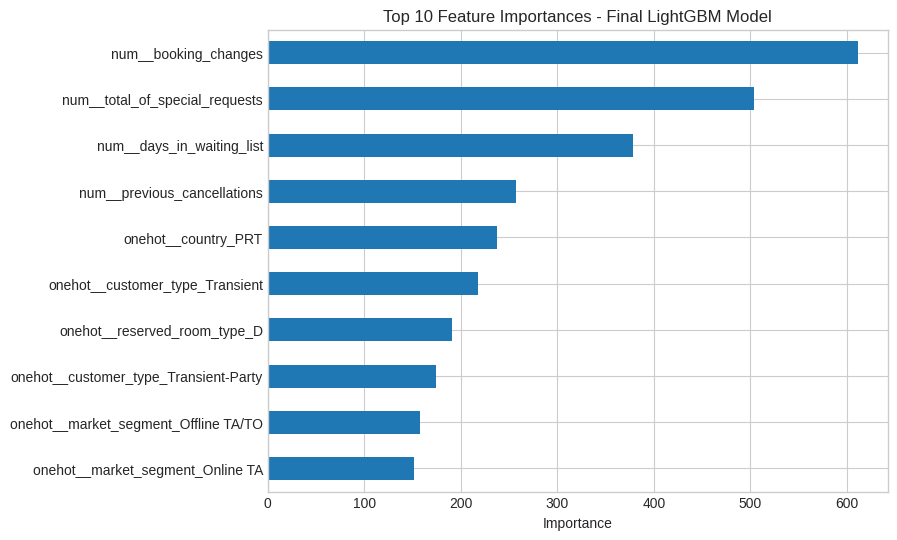

In [ ]:
# Feature Importance
feature_names = best_model.named_steps['preprocess'].get_feature_names_out()
importances = best_model.named_steps['model'].feature_importances_

fi = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
fi.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances - Final LightGBM Model')
plt.xlabel('Importance')
plt.show()

Grafik ini menampilkan 10 fitur yang paling berpengaruh dalam model LightGBM. Semakin panjang kolomnya, semakin besar kontribusi fitur tersebut terhadap prediksi. Terlihat bahwa booking_changes, total_of_special_requests, dan days_in_waiting_list menjadi fitur yang paling kuat pengaruhnya, diikuti beberapa fitur kategori hasil one-hot encoding.

In [ ]:
print("Model LightGBM + Oversampling + Tuning")
print(f"ROC AUC (Test) : {roc_auc_tuned:.4f}")
print("\nClassification Report Tuned LGBM:\n")
print(report_tuned)

Model LightGBM + Oversampling + Tuning
ROC AUC (Test) : 0.8918

Classification Report Tuned LGBM:

              precision    recall  f1-score   support

           0       0.87      0.80      0.83     10559
           1       0.70      0.79      0.74      6156

    accuracy                           0.80     16715
   macro avg       0.78      0.80      0.79     16715
weighted avg       0.81      0.80      0.80     16715



Hasil evaluasi model LightGBM setelah oversampling dan tuning. yang dimana ROC AUC sebesar 0.8918 menunjukkan model cukup baik dalam membedakan booking yang dibatalkan dan tidak. Dari classification report, kelas tidak dibatalkan memiliki precision 0.87 dan recall 0.80, sedangkan kelas dibatalkan memiliki precision 0.70 dan recall 0.79. Secara keseluruhan, akurasi model berada di angka 0.80, menandakan performanya sudah cukup stabil.

In [ ]:
# Model LightGBM + RandomOverSampler + Target Encoder
ros = RandomOverSampler(random_state=2025)

final_lgbm = lgb.LGBMClassifier(random_state=2025, num_leaves=31, max_bin=230, min_child_samples=20, n_estimators=150, learning_rate=0.1)
final_pipeline = ImbPipeline(steps=[('oversampling', ros), ('target_encoding', ce.TargetEncoder(cols=categorical_features)), ('model', final_lgbm)])

Berdasarkan hasil optimasi hyperparameter sebelumnya, pada tahap ini kami membangun arsitektur model final yang paling optimal dengan mengintegrasikan teknik Target Encoding untuk menangani variabel kategorikal.

In [ ]:
# Cross-validation di train
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2025)
cv_scores = cross_val_score(final_pipeline, x_train, y_train, cv=skfold, scoring='roc_auc', n_jobs=-1)

print("Final LightGBM + TargetEncoder + ROS (Train CV)")
print(f"Mean ROC AUC : {cv_scores.mean():.4f}")
print(f"Std  ROC AUC : {cv_scores.std():.4f}")

Final LightGBM + TargetEncoder + ROS (Train CV)
Mean ROC AUC : 0.8920
Std  ROC AUC : 0.0026


Pada output diatas terlihat pengujian menghasilkan rata-rata skor ROC-AUC sebesar 0.8920 dengan standar deviasi 0.0026, menegaskan bahwa model ini memiliki performa prediksi yang tinggi serta konsistensi yang stabil. Skor ini sedikit meningkat dibandingkan pengujian sebelumnya menunjukkan bahwa penambahan Target Encoder memberikan kontribusi positif meskipun kecil.

In [ ]:
# Fit final model di seluruh train
final_pipeline.fit(x_train, y_train)
y_proba_final = final_pipeline.predict_proba(x_test)[:, 1]
y_pred_final = (y_proba_final >= 0.5).astype(int)

print("Accuracy :", accuracy_score(y_test, y_pred_final))
print("ROC AUC  :", roc_auc_score(y_test, y_proba_final))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_final))

[LightGBM] [Info] Number of positive: 42236, number of negative: 42236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 182
[LightGBM] [Info] Number of data points in the train set: 84472, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy : 0.7985043374214778
ROC AUC  : 0.8923915086249787

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.81      0.83     10559
           1       0.70      0.78      0.74      6156

    accuracy                           0.80     16715
   macro avg       0.78      0.80      0.79     16715
weighted avg       0.81      0.80      0.80     16715



Berdasarkan hasil evaluasi pada data uji (test set), terlihat model final LightGBM menunjukkan kinerja yang robust dengan skor ROC-AUC sebesar 0.8924 dan akurasi keseluruhan 79.85%.

Kemudian hasil Classification Report menunjukkan bahwa model memiliki nilai Recall sebesar 78% untuk Kelas 1 (Booking dibatalkan). Angka ini mengindikasikan bahwa model sangat efektif dalam mengidentifikasi mayoritas pelanggan yang berpotensi membatalkan pesanan, sehingga memungkinkan manajemen hotel untuk mengambil langkah preventif guna meminimalkan kerugian pendapatan. Sementara itu, kemampuan model mempertahankan Recall sebesar 81% pada Kelas 0 (Booking tidak dibatalkan) menunjukkan bahwa model tidak mengorbankan akurasi pada pelanggan loyal demi mengejar deteksi pembatalan. Keseimbangan performa ini membuktikan efektivitas kombinasi teknik Random Oversampling dan Target Encoding yang diterapkan dalam pipeline.

## Conclusion & Recommendation

In [ ]:
print('Best Classification Report Tuned')
print("Accuracy :", accuracy_score(y_test, y_pred_final))
print("ROC AUC  :", roc_auc_score(y_test, y_proba_final))
print(classification_report(y_test, y_pred_final))

Best Classification Report Tuned
Accuracy : 0.7985043374214778
ROC AUC  : 0.8923915086249787
              precision    recall  f1-score   support

           0       0.87      0.81      0.83     10559
           1       0.70      0.78      0.74      6156

    accuracy                           0.80     16715
   macro avg       0.78      0.80      0.79     16715
weighted avg       0.81      0.80      0.80     16715



Bagian ini menampilkan performa model setelah tuning. Akurasi model mencapai 0.80, model mampu memberikan prediksi benar sekitar 80% dari total data uji. Nilai ROC AUC = 0.8929 menunjukkan model cukup baik dalam membedakan booking yang dibatalkan dan tidak.

Berdasarkan hasil akhir classification report dari model LightGBM, kami dapat menyimpulkan bahwa bila seandainya nanti model tersebut digunakan untuk memfilter/menyaring daftar pelanggan yang melakukan booking hotel, maka model akan dapat menyaring 81% pelanggan yang sebenarnya telah melakukan booking dan memang akan datang untuk menginap di hotel kami (loyal), sehingga kita tidak perlu membuang biaya atau waktu untuk menghubungi mereka. Di sisi lain, model kami juga berhasil mendeteksi 78% dari total pelanggan yang berpotensi membatalkan reservasi, memungkinkan tindakan preventif dilakukan lebih awal.

Dari segi ketepatan prediksi, model mencatatkan nilai presisi (Precision) untuk prediksi pembatalan sebesar 70%. Artinya, ketika sistem memprediksi seorang pelanggan akan batal, tingkat keakuratannya adalah 70%. Adapun tingkat kesalahan prediksi (False Alarm) pada tamu loyal tercatat sebesar 19%. Persentase ini merupakan trade-off yang wajar dan efisien demi memastikan deteksi pembatalan yang maksimal.

Selain itu, implementasi model LightGBM ini tidak hanya berfungsi menjaga stabilitas operasional, tetapi juga berperan krusial dalam mitigasi risiko finansial. Dengan prediksi yang akurat, pihak hotel dapat meminimalisir potensi kehilangan pendapatan akibat pembatalan mendadak, sekaligus mengalokasikan anggaran retensi pelanggan secara lebih efektif dan tepat sasaran.

### Recommendation

Hal-hal yang bisa dilakukan untuk mengembangkan project dan modelnya lebih baik lagi dimasa depan:
- Membuat kebijakan baru pada sistem reservasi atau booking yang mewajibkan setiap pelanggan atau tamu yang akan menginap untuk melengkapi data-data yang dibutuhkan pihak hotel.
- Mencoba algoritma Machine Learning lain yang handal menangani data kategorikal, seperti CatBoost, yang bisa memproses fitur tanpa perlu Target Encoding manual.
- Menganalisa karakteristik data pada pelanggan yang "Salah Tebak" (misalnya 22% pelanggan batal yang tidak terdeteksi model). Apakah mereka membatalkan booking secara mendadak (H-1)? Apa alasan mereka membatalkan booking? Memahami pola kegagalan ini dapat memberikan wawasan bisnis baru atau ide untuk fitur baru yang belum terpikirkan.